In [2]:
!pip install torch
!pip install midas



[notice] A new release of pip available: 22.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
     -------------------------------------- 202.6/202.6 kB 2.5 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 23.2.1


[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install timm


     ---------------------------------------- 2.2/2.2 MB 5.9 MB/s eta 0:00:00
     -------------------------------------- 277.2/277.2 kB 5.8 MB/s eta 0:00:00
     -------------------------------------- 302.0/302.0 kB 4.6 MB/s eta 0:00:00
     ------------------------------------- 173.4/173.4 kB 10.9 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import torch
import cv2
import matplotlib.pyplot as plt 

# Download the MiDaS model
midas = torch.hub.load("intel-isl/MiDaS", "MiDaS_small")
midas.to("cpu")
midas.eval()


Using cache found in C:\Users\DIYA/.cache\torch\hub\intel-isl_MiDaS_master


Loading weights:  None


c:\users\diya\appdata\local\programs\python\python39\lib\site-packages\torch\hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/rwightman/gen-efficientnet-pytorch/zipball/master" to C:\Users\DIYA/.cache\torch\hub\master.zip
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_lite3-b733e338.pth" to C:\Users\DIYA/.cache\torch\hub\checkpoints\tf_efficientnet_l

MidasNet_small(
  (pretrained): Module(
    (layer1): Sequential(
      (0): Conv2dSameExport(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
      (3): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (act1): ReLU6(inplace=True)
          (se): Identity()
          (conv_pw): Conv2d(32, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn2): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (act2): Identity()
        )
      )
      (4): Sequential(
        (0): InvertedResidual(
          (conv_pw): Conv2d(24, 144, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(144,

Using cache found in C:\Users\DIYA/.cache\torch\hub\intel-isl_MiDaS_master


[[728.896   728.93866 728.9017  ... 705.65454 653.0214  627.8024 ]
 [728.6392  727.8137  725.9182  ... 721.09393 674.91876 652.948  ]
 [728.95105 726.0159  719.5679  ... 754.0099  721.33136 706.1559 ]
 ...
 [166.88574 166.79001 166.79195 ... 966.74146 959.22833 957.09784]
 [166.02954 166.01746 166.06601 ... 966.3265  957.56476 954.9804 ]
 [165.6333  165.66829 165.76273 ... 966.28406 956.76294 953.8825 ]]


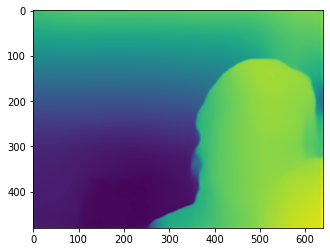

[[ 679.9002   680.01245  680.2339  ...  572.1343   529.8975   509.62006]
 [ 679.57654  678.87366  677.3258  ...  584.9572   547.90344  530.2389 ]
 [ 679.5944   676.9062   671.01526 ...  612.43054  586.2128   574.016  ]
 ...
 [ 262.11304  262.27716  263.0367  ... 1035.3032  1027.3171  1025.0885 ]
 [ 259.34543  259.58945  260.32816 ... 1034.508   1025.3812  1022.7566 ]
 [ 258.10165  258.4018   259.18228 ... 1034.34    1024.4941  1021.59656]]


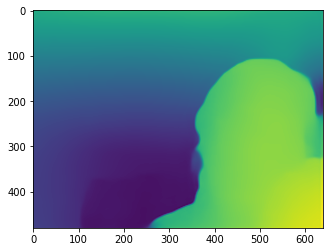

[[ 683.4056   683.29706  683.10364 ...  582.2626   539.0661   518.3209 ]
 [ 683.0037   682.1505   680.35736 ...  595.26025  557.42883  539.38605]
 [ 682.842    680.1717   674.4442  ...  623.10486  596.4942   584.1091 ]
 ...
 [ 262.58044  262.62622  263.14804 ... 1022.16504 1014.5291  1012.43195]
 [ 259.9208   260.00485  260.4279  ... 1021.4409  1012.69586 1010.2141 ]
 [ 258.7262   258.8524   259.29205 ... 1021.3092  1011.86176 1009.1139 ]]


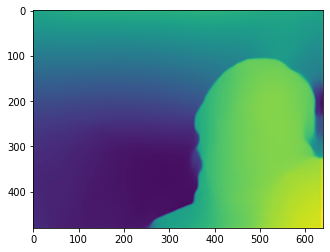

[[ 660.1134   660.0755   660.0149  ...  555.90704  513.8585   493.71536]
 [ 659.91595  659.1201   657.41833 ...  568.62695  531.8474   514.35126]
 [ 660.1929   657.54706  651.81024 ...  595.83246  570.0753   558.1202 ]
 ...
 [ 275.74664  275.7304   276.1827  ... 1055.5768  1047.759   1045.6357 ]
 [ 273.49786  273.4536   273.67093 ... 1054.2219  1044.9474  1042.2871 ]
 [ 272.51346  272.48193  272.6535  ... 1053.7865  1043.644   1040.6444 ]]


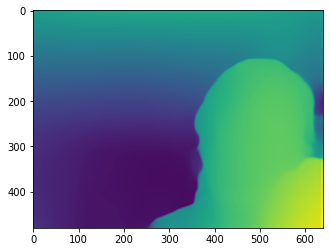

[[678.0722  677.9614  677.73285 ... 554.4551  513.4259  493.713  ]
 [677.9123  677.0493  675.2038  ... 566.8552  530.8862  513.72217]
 [678.2328  675.5343  669.7125  ... 593.4195  568.0263  556.1945 ]
 ...
 [271.77365 271.55786 271.59756 ... 988.75085 981.08716 978.95123]
 [269.55374 269.3863  269.3475  ... 988.12396 979.61115 977.2023 ]
 [268.59174 268.4652  268.4393  ... 988.0412  978.9492  976.3281 ]]


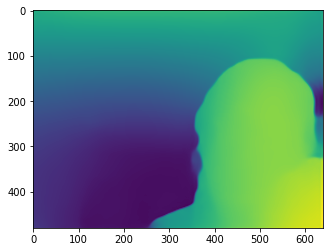

[[668.8454  668.9836  669.2507  ... 545.7742  505.02094 485.46448]
 [668.67694 668.0014  666.5138  ... 557.9619  522.2221  505.19345]
 [669.01605 666.36865 660.5962  ... 584.0211  558.75073 547.0076 ]
 ...
 [262.932   263.1258  264.0214  ... 951.64044 944.65283 942.77795]
 [260.35083 260.5298  261.2271  ... 950.8088  942.8447  940.63806]
 [259.18246 259.38306 260.0565  ... 950.63416 942.04095 939.59894]]


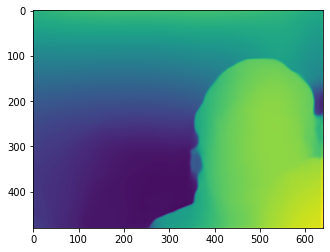

[[679.5983  679.62067 679.66516 ... 567.8649  524.5435  503.82544]
 [679.40967 678.6405  676.9784  ... 580.6849  542.83826 524.8553 ]
 [679.70685 677.01324 671.16864 ... 608.07745 581.69525 569.44086]
 ...
 [296.59338 296.68384 297.43225 ... 976.3413  969.2458  967.3635 ]
 [293.6943  293.74567 294.21643 ... 975.1785  967.1959  965.0254 ]
 [292.42126 292.48752 292.90787 ... 974.8617  966.2888  963.9022 ]]


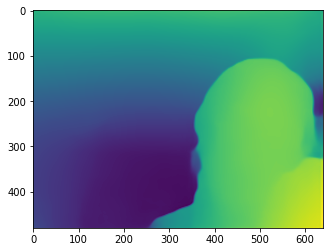

[[639.74084 639.7744  639.88904 ... 606.8117  561.1075  539.2759 ]
 [639.4476  638.7278  637.19165 ... 620.1983  580.3155  561.3917 ]
 [639.5068  636.9358  631.3135  ... 648.83813 621.1324  608.29584]
 ...
 [271.21878 271.4599  272.46503 ... 950.1435  943.2162  941.34717]
 [268.64706 268.85178 269.58392 ... 949.5372  941.87506 939.78625]
 [267.51044 267.72906 268.4082  ... 949.4553  941.27716 939.0054 ]]


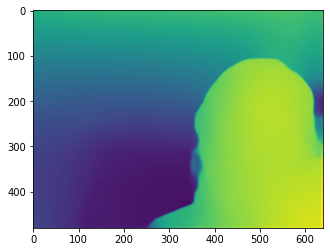

[[592.1688  592.1706  592.13416 ... 534.353   496.71198 478.60718]
 [592.0092  591.34485 589.8772  ... 545.0355  512.00226 496.21637]
 [592.3188  590.02136 585.01685 ... 567.719   544.26843 533.3136 ]
 ...
 [271.03278 271.00577 271.40134 ... 992.122   984.7239  982.7192 ]
 [268.74084 268.70215 268.91214 ... 990.80115 982.33276 979.96014]
 [267.74274 267.72437 267.91077 ... 990.4288  981.28503 978.6593 ]]


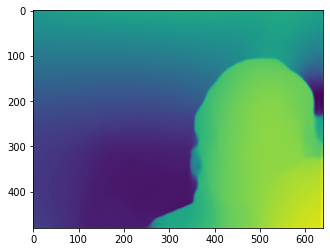

[[ 581.0646   581.0021   580.93463 ...  598.56177  555.37067  534.584  ]
 [ 580.85046  580.117    578.59283 ...  611.5517   573.8173   555.7721 ]
 [ 581.02313  578.6488   573.5374  ...  639.12616  612.80164  600.4894 ]
 ...
 [ 232.77325  232.7055   232.9324  ... 1028.9993  1021.2224  1019.0866 ]
 [ 230.95682  230.94055  231.11516 ... 1028.3073  1019.6453  1017.22754]
 [ 230.15712  230.18303  230.38158 ... 1028.217   1018.95325 1016.31616]]


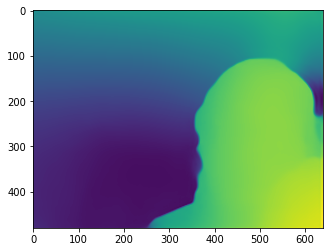

[[ 537.6562   537.4976   537.1616  ...  410.70947  381.7541   367.8064 ]
 [ 537.5077   536.7708   535.19867 ...  419.1791   393.85394  381.74182]
 [ 537.82837  535.67194  531.0433  ...  437.30933  419.58514  411.32812]
 ...
 [ 226.23691  226.64642  227.95601 ... 1021.19525 1013.62384 1011.559  ]
 [ 224.2475   224.6371   225.73134 ... 1020.3952  1011.7969  1009.38214]
 [ 223.36559  223.7689   224.81961 ... 1020.24316 1010.9805  1008.31616]]


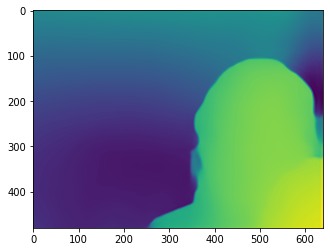

[[556.45404  556.23175  555.77484  ... 124.113464 123.38692  123.09447 ]
 [556.1943   555.40594  553.7299   ... 121.92745  122.85695  123.338394]
 [556.3071   554.1095   549.3761   ... 117.68822  122.210266 124.34884 ]
 ...
 [222.00421  222.15352  222.86676  ... 984.29895  976.94824  974.9498  ]
 [219.93471  220.05176  220.54532  ... 983.33514  974.9826   972.645   ]
 [219.01903  219.14778  219.60541  ... 983.0951   974.0963   971.5171  ]]


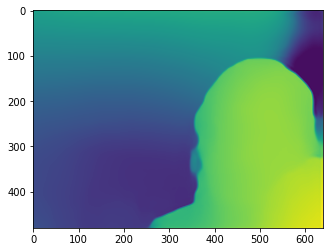

[[530.3121  530.0623  529.54913 ... 342.31067 314.43008 301.18423]
 [530.009   529.2315  527.57367 ... 350.56573 325.97842 314.42578]
 [529.99585 527.89734 523.35144 ... 368.7367  350.91058 342.86   ]
 ...
 [204.88976 205.24075 206.32108 ... 971.58777 964.5375  962.65137]
 [203.09964 203.4064  204.23787 ... 970.7715  962.59406 960.3112 ]
 [202.30312 202.61519 203.39359 ... 970.5955  961.7146  959.16364]]


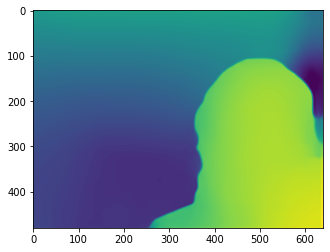

[[ 593.88684  593.93585  594.0253  ...  538.1234   499.684    481.2076 ]
 [ 593.6974   593.067    591.69336 ...  549.7781   516.24255  500.23538]
 [ 593.95795  591.6692   586.69495 ...  574.5374   551.2843   540.45996]
 ...
 [ 228.4519   228.58147  229.27966 ... 1012.3904  1004.823   1002.75134]
 [ 226.78912  226.86513  227.2835  ... 1011.38696 1002.5612  1000.0349 ]
 [ 226.06319  226.13567  226.47638 ... 1011.13513 1001.54517  998.72363]]


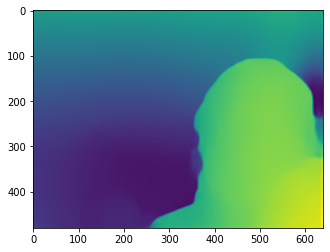

[[554.7676  554.662   554.44855 ... 512.5469  476.14224 458.64685]
 [554.5814  553.86755 552.3419  ... 523.4604  491.6385  476.45624]
 [554.8083  552.59906 547.8218  ... 546.6805  524.475   514.15533]
 ...
 [238.41422 238.98076 240.60168 ... 971.92334 965.0026  963.1538 ]
 [236.20848 236.72763 238.0653  ... 971.05414 963.0323  960.7964 ]
 [235.2144  235.74022 237.0169  ... 970.8282  962.1109  959.60913]]


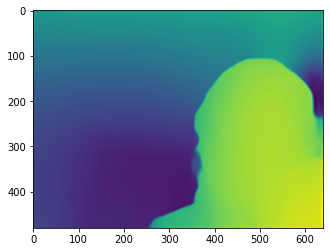

[[ 578.17737  578.1822   578.20746 ...  401.5444   370.90607  356.27927]
 [ 577.98267  577.3074   575.8456  ...  410.13925  383.36884  370.70233]
 [ 578.18427  575.83563  570.6872  ...  428.60464  409.92102  401.37866]
 ...
 [ 260.84357  260.9299   261.5574  ... 1013.11115 1005.53955 1003.4495 ]
 [ 258.72336  258.78915  259.214   ... 1012.1224  1003.1798  1000.5837 ]
 [ 257.79398  257.87668  258.2719  ... 1011.8531  1002.08655  999.1674 ]]


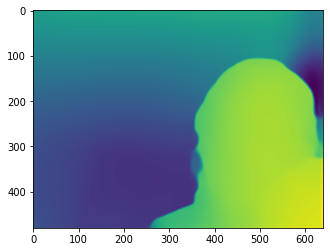

[[523.1711  523.0906  522.92847 ... 500.9753  464.9987  447.72076]
 [522.88135 522.26056 520.9288  ... 511.67578 480.1773  465.15613]
 [522.9139  520.9463  516.6781  ... 534.40985 512.31476 502.0384 ]
 ...
 [193.35977 193.68636 194.79993 ... 982.4569  975.21106 973.242  ]
 [191.69533 192.04323 193.05914 ... 981.60645 973.3496  971.03613]
 [190.97156 191.34926 192.36913 ... 981.4222  972.5123  969.9541 ]]


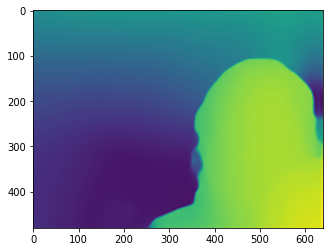

[[ 554.86444  554.6441   554.2207  ...  438.8324   406.10074  390.43945]
 [ 554.4794   553.6721   551.97943 ...  448.20264  419.57584  405.99594]
 [ 554.385    552.12024  547.2539  ...  468.23306  448.19385  438.99045]
 ...
 [ 215.27928  215.65822  216.83298 ... 1018.8885  1011.2378  1009.1337 ]
 [ 213.33061  213.67464  214.60388 ... 1018.25256 1009.63544 1007.2114 ]
 [ 212.46367  212.81935  213.70341 ... 1018.16614 1008.91046 1006.2494 ]]


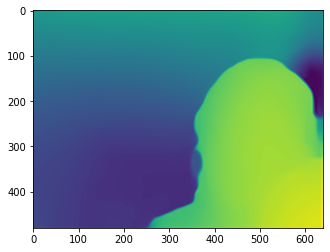

[[ 566.416    566.104    565.4744  ...  420.17035  389.63394  374.98505]
 [ 565.95807  565.1168   563.3526  ...  428.95224  402.26132  389.5612 ]
 [ 565.6465   563.4829   558.8602  ...  447.74945  429.102    420.4968 ]
 ...
 [ 201.75989  202.25388  203.72232 ... 1021.281   1013.46594 1011.29016]
 [ 199.83264  200.2804   201.47311 ... 1020.8533  1011.7986  1009.17926]
 [ 198.98824  199.44164  200.5725  ... 1020.853   1011.0348  1008.12177]]


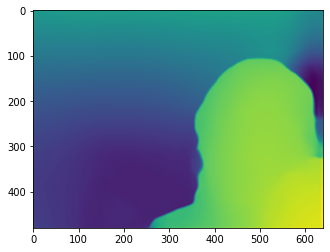

[[ 470.7198   470.6122   470.3977  ...  296.4973   272.8512   261.7205 ]
 [ 470.6178   469.98663  468.6402  ...  302.01294  281.2679   271.5872 ]
 [ 471.0531   469.12006  464.94055 ...  314.38052  299.8313   293.2446 ]
 ...
 [ 200.97124  201.16841  201.90764 ... 1063.9813  1056.1707  1054.0563 ]
 [ 199.23244  199.4401   200.06914 ... 1062.8167  1053.7756  1051.2285 ]
 [ 198.46095  198.69427  199.32356 ... 1062.4785  1052.6721  1049.833  ]]


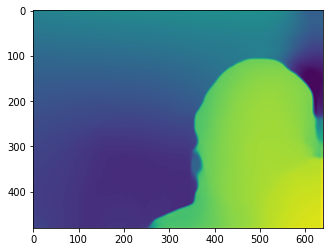

[[588.38617 588.24475 587.9768  ... 524.0126  486.64786 468.64267]
 [588.3066  587.52527 585.87836 ... 535.7595  503.17624 487.582  ]
 [588.8021  586.44965 581.3921  ... 560.7031  538.15466 527.622  ]
 ...
 [214.51537 214.63057 215.30296 ... 997.35016 990.1078  988.1434 ]
 [212.79541 212.88889 213.35526 ... 996.2124  987.7064  985.2833 ]
 [212.0528  212.15869 212.58441 ... 995.8885  986.61584 983.89526]]


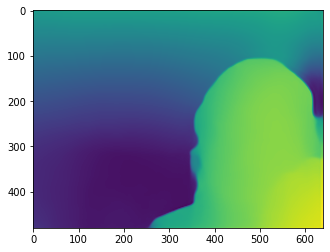

[[ 564.1221   564.0649   563.9655  ...  586.0781   544.3631   524.3058 ]
 [ 563.8293   563.1754   561.7991  ...  598.6669   562.19806  544.7832 ]
 [ 563.8741   561.7497   557.20154 ...  625.3661   599.87634  587.9965 ]
 ...
 [ 232.24431  232.37505  233.0285  ... 1012.82324 1005.6163  1003.6725 ]
 [ 229.89778  230.03674  230.54623 ... 1011.8493  1003.2094  1000.72943]
 [ 228.85785  229.026    229.53198 ... 1011.58777 1002.098    999.282  ]]


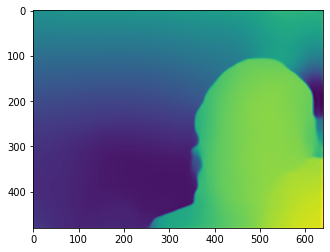

[[616.8778  617.1332  617.6587  ... 553.9329  514.5034  495.53195]
 [616.96075 616.4116  615.19336 ... 565.7276  531.2654  514.7959 ]
 [617.72253 615.23303 609.77466 ... 590.8073  566.73785 555.5094 ]
 ...
 [222.84148 222.94896 223.57025 ... 988.55365 981.33746 979.39856]
 [221.05533 221.12653 221.525   ... 987.5213  979.2941  977.0141 ]
 [220.28474 220.35866 220.70209 ... 987.26636 978.3922  975.8712 ]]


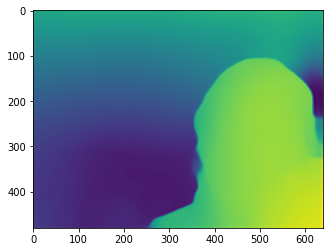

[[ 566.3469   566.2878   566.1724  ...  261.1016   239.31323  229.40892]
 [ 566.1908   565.5009   564.0229  ...  262.817    245.65862  237.9138 ]
 [ 566.50214  564.26196  559.4094  ...  267.11685  259.70053  256.485  ]
 ...
 [ 231.62717  232.04463  233.37756 ... 1004.94415  997.60297  995.59973]
 [ 229.61581  229.96988  230.98952 ... 1004.0455   995.5035   993.0745 ]
 [ 228.73357  229.0851   230.024   ... 1003.8193   994.53687  991.82434]]


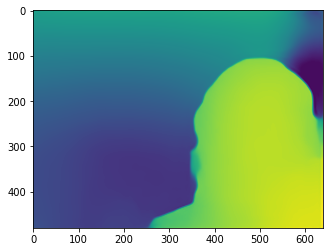

[[ 579.3746   579.2449   578.9806  ...  482.04565  447.7471   431.22025]
 [ 579.05804  578.3192   576.7442  ...  492.5571   462.63153  448.31018]
 [ 579.06506  576.82166  571.983   ...  514.9597   494.20624  484.5162 ]
 ...
 [ 226.86986  227.00836  227.7251  ... 1010.57074 1003.01965 1000.92377]
 [ 225.09013  225.19443  225.67397 ... 1009.8647  1000.9989   998.4211 ]
 [ 224.31519  224.42664  224.8527  ... 1009.7437  1000.0831   997.1948 ]]


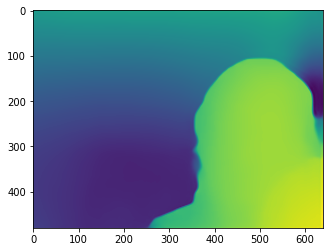

[[557.0285  556.7046  556.0921  ... 138.81151 136.80205 135.87704]
 [556.70483 555.8134  553.97125 ... 137.51497 137.88138 138.06404]
 [556.7517  554.44305 549.5112  ... 135.35272 140.91948 143.50964]
 ...
 [182.69579 183.21321 184.59488 ... 988.98914 981.9372  980.0596 ]
 [180.7786  181.23532 182.32687 ... 988.1393  979.71497 977.32697]
 [179.90619 180.36194 181.38365 ... 987.94995 978.7093  976.0001 ]]


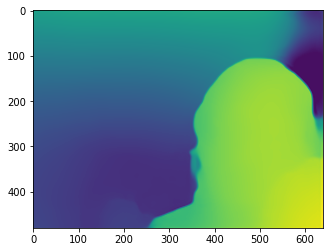

[[ 619.12213  618.9243   618.56586 ...  497.46417  461.43353  444.064  ]
 [ 618.70264  617.8674   616.13617 ...  509.24203  477.85724  462.8414 ]
 [ 618.5456   616.13605  610.99054 ...  534.28546  512.6436   502.5702 ]
 ...
 [ 221.71262  221.81775  222.39157 ... 1012.8355  1005.3089  1003.24945]
 [ 219.82695  219.91359  220.30225 ... 1012.09766 1003.45984 1001.0153 ]
 [ 219.00179  219.0997   219.45284 ... 1011.95703 1002.6213   999.9128 ]]


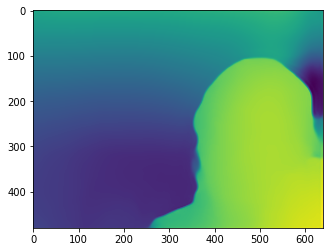

[[575.09204 575.0262  574.92694 ... 309.8394  281.15964 267.70084]
 [574.8689  574.1746  572.71606 ... 316.74728 292.42072 281.08493]
 [575.05817 572.8164  567.98755 ... 332.1853  317.45163 310.77524]
 ...
 [195.84607 195.95474 196.5462  ... 976.4209  969.3194  967.4083 ]
 [194.33365 194.4122  194.81142 ... 975.5566  967.2601  964.91833]
 [193.68665 193.76999 194.12628 ... 975.37103 966.3449  963.72174]]


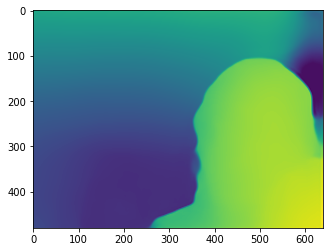

[[ 555.9097   555.6119   555.07056 ...  492.59302  457.2384   440.25204]
 [ 555.5603   554.691    552.91614 ...  503.1184   472.20734  457.45822]
 [ 555.4789   553.19495  548.3475  ...  525.492    503.90265  493.85278]
 ...
 [ 233.88531  233.91965  234.3618  ... 1011.90845 1004.3786  1002.326  ]
 [ 231.68039  231.73134  232.05952 ... 1010.766   1001.977    999.4734 ]
 [ 230.69843  230.778    231.10625 ... 1010.4478  1000.8972   998.1005 ]]


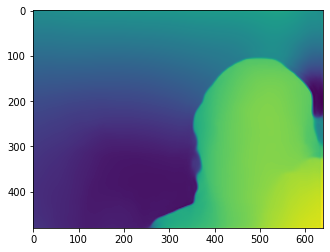

[[ 515.6155   515.6988   515.893   ...  423.84744  390.11084  374.06738]
 [ 515.5811   515.05396  513.9262  ...  433.76117  404.4275   390.60736]
 [ 516.11084  514.09094  509.70834 ...  455.05228  434.97482  425.84476]
 ...
 [ 216.10161  216.40297  217.54466 ... 1002.74396  995.404    993.41327]
 [ 214.24373  214.5536   215.5555  ... 1002.04016  993.4991   991.0815 ]
 [ 213.44058  213.77759  214.77089 ... 1001.92065  992.6443   989.945  ]]


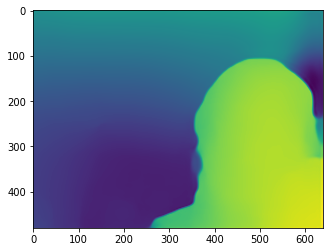

[[493.2775  492.86737 492.03015 ... 289.43405 263.9882  252.05664]
 [492.96545 492.11264 490.30838 ... 295.00558 272.60574 262.19678]
 [492.9361  490.94727 486.64496 ... 307.51804 291.59247 284.42694]
 ...
 [237.63713 237.96686 239.1333  ... 987.4117  979.9652  977.88086]
 [235.89383 236.21198 237.17267 ... 986.66187 978.0546  975.5597 ]
 [235.15193 235.4845  236.39972 ... 986.5103  977.18744 974.41846]]


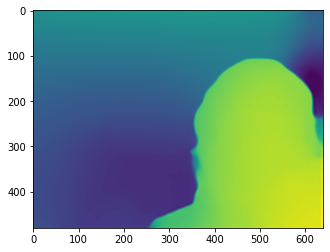

[[533.249   533.0516  532.63635 ... 452.5033  419.43314 403.55148]
 [532.96204 532.21783 530.62384 ... 462.59116 433.72556 419.97626]
 [532.98566 530.8816  526.3335  ... 484.11108 464.05334 454.78516]
 ...
 [213.48178 213.85355 215.00467 ... 981.78625 974.4426  972.42554]
 [211.54839 211.91476 212.90138 ... 981.24194 972.8713  970.50415]
 [210.68645 211.07362 212.04121 ... 981.196   972.1672  969.5531 ]]


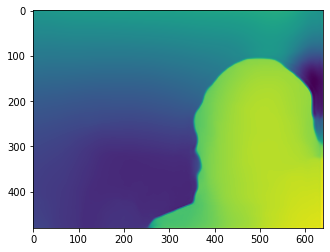

[[ 584.265    584.2071   584.1139  ...  557.9615   517.7522   498.4209 ]
 [ 583.9668   583.25183  581.734   ...  570.1266   534.97705  518.18774]
 [ 584.0122   581.6782   576.62256 ...  595.91077  571.3666   559.90533]
 ...
 [ 228.04378  228.35715  229.41794 ... 1012.04297 1004.3677  1002.2521 ]
 [ 225.89345  226.16782  226.9762  ... 1011.41266 1002.8241  1000.4113 ]
 [ 224.9491   225.23384  225.99417 ... 1011.32733 1002.12805  999.4906 ]]


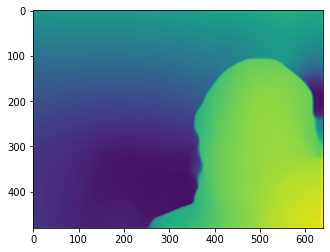

[[530.64825  530.3472   529.76526  ... 109.11636  105.79815  104.41483 ]
 [530.2632   529.4614   527.795    ... 107.62304  105.62051  104.85765 ]
 [530.04095  527.98535  523.5823   ... 104.770874 105.59562  106.14509 ]
 ...
 [220.09143  220.36949  221.34622  ... 981.85614  974.4997   972.46204 ]
 [218.10785  218.3825   219.19295  ... 980.88965  972.4913   970.0959  ]
 [217.22614  217.525    218.32071  ... 980.6487   971.5904   968.9464  ]]


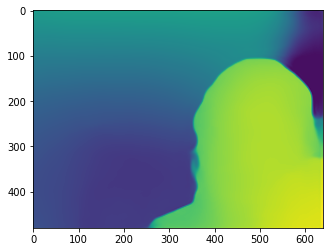

[[ 599.7197   599.4305   598.8673  ...  560.92633  521.1199   501.89233]
 [ 599.29694  598.424    596.6006  ...  573.6048   538.8362   522.1502 ]
 [ 599.06433  596.73566  591.74414 ...  600.498    576.2816   564.91815]
 ...
 [ 255.45602  255.7852   256.9321  ... 1001.1047   993.5422   991.4403 ]
 [ 253.32912  253.6105   254.47528 ... 1000.41394  991.82904  989.3813 ]
 [ 252.38988  252.67871  253.48363 ... 1000.29156  991.05304  988.3604 ]]


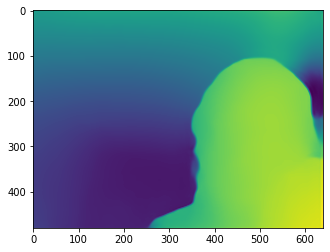

[[ 475.8921   475.39276  474.39203 ...  379.00427  352.21558  339.30655]
 [ 475.4088   474.5332   472.70728 ...  386.8025   363.36188  352.15375]
 [ 475.02585  473.1669   469.1707  ...  403.52203  387.08588  379.452  ]
 ...
 [ 184.45633  184.71921  185.64243 ... 1012.5075  1004.63586 1002.42706]
 [ 182.9446   183.21413  184.01166 ... 1011.9114  1003.26917 1000.83276]
 [ 182.26479  182.55565  183.34084 ... 1011.8552  1002.6749  1000.0483 ]]


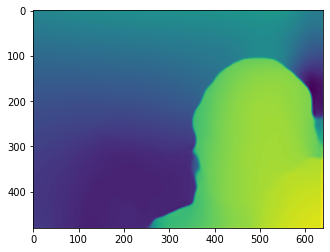

[[562.41797 562.3478  562.20447 ... 614.6872  569.94684 548.4221 ]
 [562.3876  561.6724  560.1294  ... 628.423   589.3086  570.6076 ]
 [562.91345 560.6155  555.61084 ... 657.4892  630.15735 617.3654 ]
 ...
 [241.00859 241.17789 241.9613  ... 987.985   980.5985  978.5611 ]
 [238.96706 239.12874 239.73845 ... 987.4185  979.0864  976.7351 ]
 [238.06554 238.25124 238.84683 ... 987.3573  978.4041  975.8223 ]]


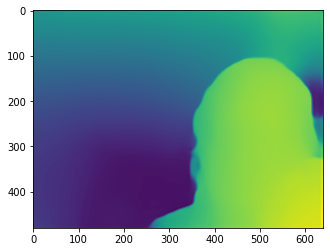

[[598.0924  597.8918  597.4831  ... 515.33203 478.736   461.07953]
 [597.5613  596.77496 595.09686 ... 527.0385  495.12476 479.82993]
 [597.1157  594.8635  589.98303 ... 551.907   529.82587 519.48975]
 ...
 [245.07431 245.05992 245.45654 ... 975.98926 968.8798  966.9541 ]
 [243.05128 243.01355 243.20705 ... 975.53406 967.4736  965.22815]
 [242.16095 242.13493 242.29144 ... 975.52734 966.8465  964.3696 ]]


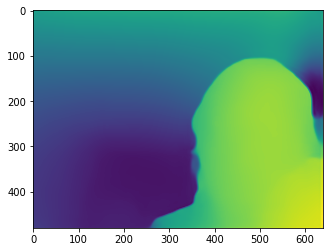

[[524.77014 524.6987  524.5984  ... 139.97821 138.8056  138.29756]
 [524.6267  523.9779  522.62604 ... 138.55379 141.01898 142.15393]
 [524.9154  522.8446  518.3892  ... 136.3233  146.85555 151.61728]
 ...
 [225.10123 225.48288 226.6897  ... 996.188   988.5044  986.32935]
 [223.07199 223.42772 224.41394 ... 995.7544  987.1126  984.62085]
 [222.1701  222.54407 223.50081 ... 995.7374  986.4682  983.7431 ]]


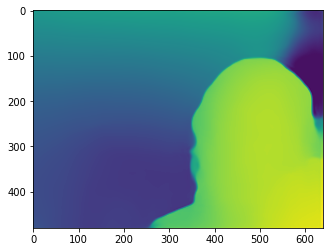

[[ 558.10474  557.95514  557.6666  ...  554.8607   515.1798   496.04764]
 [ 557.7753   557.04877  555.5086  ...  567.0846   532.38434  515.75964]
 [ 557.6456   555.49207  550.83124 ...  592.9915   568.7142   557.3361 ]
 ...
 [ 241.54965  242.084    243.66196 ... 1020.3865  1012.9932  1011.0206 ]
 [ 239.32841  239.80101  241.06036 ... 1019.31744 1010.75604 1008.3716 ]
 [ 238.33682  238.81093  239.99501 ... 1019.0439  1009.75476 1007.09296]]


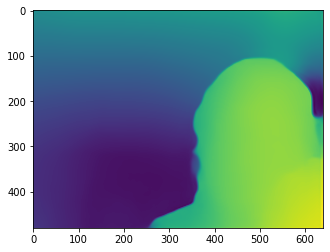

[[541.524   541.2749  540.74854 ... 316.0622  287.3567  273.8421 ]
 [541.3359  540.52185 538.7765  ... 322.84772 298.35678 286.90802]
 [541.5686  539.35376 534.562   ... 338.1496  322.70844 315.6854 ]
 ...
 [235.60812 235.8688  236.8302  ... 942.5595  935.4359  933.4753 ]
 [233.55846 233.7857  234.49628 ... 941.65094 933.4807  931.1571 ]
 [232.64764 232.88873 233.55574 ... 941.4152  932.5875  930.0151 ]]


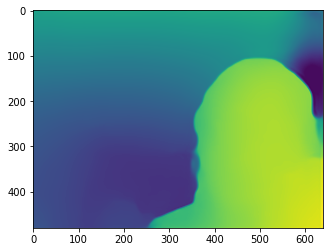

[[ 570.2765   570.0634   569.6681  ...  423.61722  393.51834  378.98456]
 [ 570.09753  569.2958   567.64105 ...  433.2462   407.05713  394.50568]
 [ 570.39246  568.1408   563.3617  ...  453.82816  435.82605  427.43637]
 ...
 [ 197.88626  197.84476  198.08228 ... 1019.62384 1011.75476 1009.5543 ]
 [ 196.17471  196.15974  196.32625 ... 1019.0272  1010.081   1007.51166]
 [ 195.42595  195.44315  195.62665 ... 1018.9722  1009.3449  1006.5192 ]]


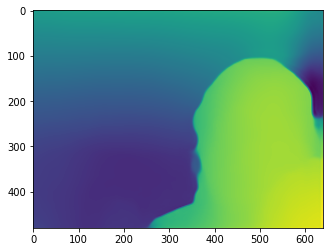

[[ 537.6707   537.4227   536.90625 ...  414.2582   384.43768  370.09808]
 [ 537.337    536.5502   534.8638  ...  423.2328   397.2253   384.82275]
 [ 537.23804  535.10315  530.4653  ...  442.45837  424.42624  416.09338]
 ...
 [ 220.21239  220.11833  220.28267 ... 1003.3245   995.56213  993.3854 ]
 [ 218.58759  218.51044  218.56036 ... 1003.1187   994.46436  992.0016 ]
 [ 217.8731   217.82117  217.86331 ... 1003.20996  993.9525   991.2692 ]]


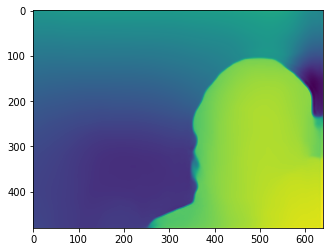

[[ 580.16003  580.00464  579.67175 ...  256.33066  234.6834   224.73827]
 [ 579.832    579.09576  577.5239  ...  259.01343  241.21555  233.10521]
 [ 579.807    577.6348   572.97394 ...  265.80615  255.79105  251.39091]
 ...
 [ 221.87834  222.41357  224.01437 ... 1010.0885  1002.318   1000.1363 ]
 [ 219.58128  220.14575  221.62643 ... 1009.24835 1000.2328   997.6032 ]
 [ 218.56924  219.17177  220.65709 ... 1009.06537  999.291    996.3685 ]]


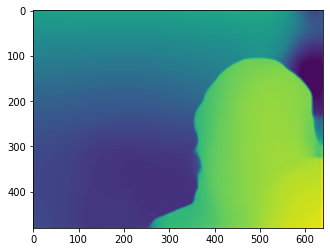

[[588.8187  588.83887 588.93286 ... 468.99905 435.75983 419.72644]
 [588.48444 587.79    586.32    ... 479.70602 450.80798 436.9694 ]
 [588.5348  586.0809  580.73486 ... 502.4966  482.71497 473.48978]
 ...
 [221.09843 221.41599 222.46841 ... 979.6712  972.5215  970.5395 ]
 [219.23709 219.50427 220.28021 ... 978.8401  970.3739  967.9115 ]
 [218.42313 218.69025 219.39418 ... 978.6389  969.39404 966.62854]]


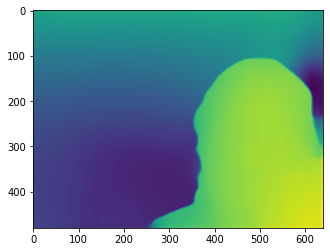

[[ 534.17413  533.7233   532.7977  ...  520.5366   483.65866  465.91193]
 [ 533.6915   532.77765  530.8477  ...  531.7053   499.4775   484.07333]
 [ 533.3613   531.2598   526.73303 ...  555.4206   532.94165  522.4523 ]
 ...
 [ 233.88538  234.28099  235.55255 ... 1008.3646  1000.931    998.8881 ]
 [ 231.81558  232.16516  233.1641  ... 1007.2117   998.42645  995.88513]
 [ 230.89618  231.2518   232.18936 ... 1006.88245  997.29285  994.43616]]


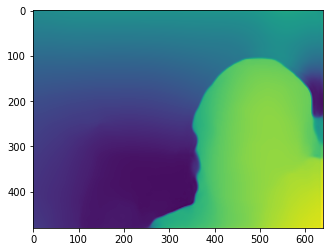

[[594.8538  594.6293  594.1708  ... 523.058   485.9037  467.99942]
 [594.5377  593.6722  591.82605 ... 534.6546  502.2612  486.75998]
 [594.56305 592.1094  586.79944 ... 559.301   536.8949  526.43896]
 ...
 [220.26085 220.55641 221.57103 ... 981.9941  974.4862  972.35547]
 [218.2854  218.5462  219.33762 ... 981.3474  972.61    970.0354 ]
 [217.40947 217.68005 218.43    ... 981.23883 971.75604 968.89307]]


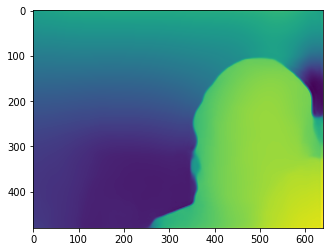

[[ 577.36053  576.9364   576.0776  ...  321.802    293.99487  280.85876]
 [ 576.8832   575.91815  573.88336 ...  329.3887   305.29657  294.02295]
 [ 576.567    574.23755  569.2136  ...  346.28006  330.1107   322.81216]
 ...
 [ 190.43973  190.71088  191.63824 ... 1023.9307  1016.37    1014.3032 ]
 [ 188.65486  188.90387  189.62556 ... 1022.8095  1014.0344  1011.53467]
 [ 187.86276  188.1253   188.80983 ... 1022.4893  1012.962   1010.1732 ]]


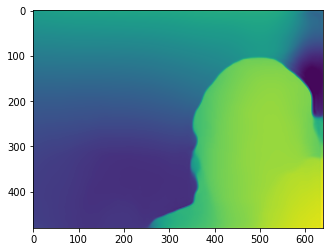

[[555.6889  555.28796 554.4884  ... 509.36002 472.84186 455.2381 ]
 [555.30054 554.3874  552.4781  ... 520.39996 488.4881  473.2006 ]
 [555.13654 552.9322  548.2043  ... 543.8413  521.5578  511.11334]
 ...
 [207.80905 207.90985 208.44641 ... 963.40894 956.2461  954.2658 ]
 [206.07156 206.16374 206.54346 ... 962.6448  954.37305 952.0035 ]
 [205.3235  205.43124 205.78778 ... 962.4816  953.5217  950.88965]]


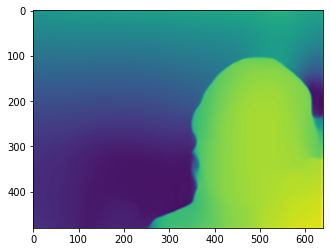

[[541.87946 541.69684 541.32806 ... 333.33047 306.20947 293.3068 ]
 [541.64307 540.9034  539.33685 ... 341.133   317.21777 305.95276]
 [541.7603  539.64264 535.0897  ... 358.20355 340.91577 333.0552 ]
 ...
 [222.96541 223.45122 224.98338 ... 975.0043  967.4547  965.3062 ]
 [220.60207 221.10585 222.49529 ... 974.82794 966.342   963.8832 ]
 [219.55215 220.09265 221.48479 ... 974.9416  965.84546 963.1598 ]]


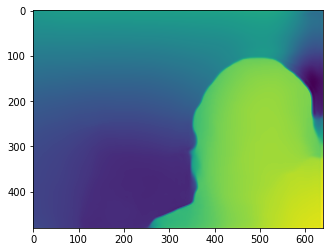

[[572.1656  572.04865 571.90356 ... 421.27045 391.2723  376.78436]
 [571.7241  570.97565 569.44934 ... 430.84125 404.68298 392.13928]
 [571.4504  569.1437  564.18646 ... 451.23102 433.1368  424.68176]
 ...
 [216.51006 216.67017 217.35849 ... 988.0061  980.5617  978.5232 ]
 [214.81093 214.94995 215.45428 ... 987.1366  978.88855 976.60535]
 [214.06923 214.21875 214.68825 ... 986.9458  978.144   975.6635 ]]


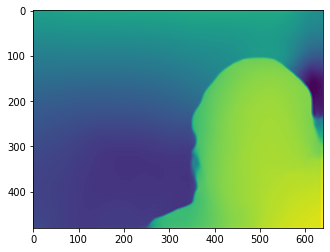

[[563.0834  563.08795 563.09973 ... 295.19543 271.24612 259.91907]
 [562.92163 562.29596 560.9496  ... 301.37534 280.29428 270.42184]
 [563.1789  561.0105  556.31305 ... 315.17938 300.0985  293.2801 ]
 ...
 [197.08868 197.3746  198.279   ... 986.958   979.31274 977.17786]
 [195.32516 195.61092 196.38359 ... 986.1947  977.7234  975.33203]
 [194.52618 194.83542 195.60481 ... 986.0672  977.0339  974.4412 ]]


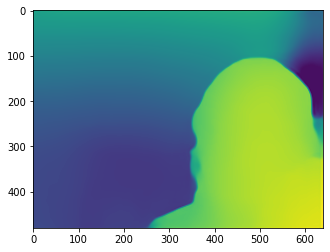

[[525.13525 524.86316 524.34015 ... 465.71506 433.08423 417.33688]
 [524.71326 523.9495  522.364   ... 475.81256 447.2925  433.61926]
 [524.4374  522.44116 518.17163 ... 497.31763 477.4229  468.10468]
 ...
 [218.72333 218.87183 219.61916 ... 964.8239  957.4844  955.4353 ]
 [217.06995 217.18303 217.68767 ... 964.21234 955.8646  953.47186]
 [216.3783  216.4907  216.92224 ... 964.1216  955.13495 952.50226]]


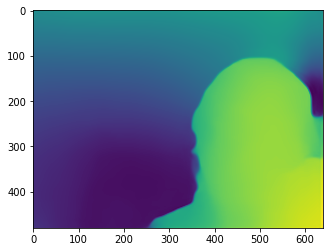

[[478.98917 478.7333  478.22403 ... 288.62207 266.96185 256.5743 ]
 [478.835   478.1192  476.63074 ... 294.46786 275.54044 266.5385 ]
 [479.12314 477.2607  473.31375 ... 307.0243  293.79807 287.70654]
 ...
 [182.69647 182.99173 183.90659 ... 976.1563  968.7412  966.68585]
 [181.09702 181.40816 182.21552 ... 975.66223 967.4801  965.1945 ]
 [180.39995 180.74068 181.55377 ... 975.6498  966.93774 964.46423]]


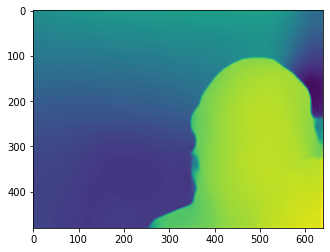

[[ 550.04004  549.9541   549.8051  ...  367.4619   339.95853  326.71515]
 [ 549.7978   549.10754  547.6477  ...  375.95773  351.85992  340.34128]
 [ 549.93225  547.75024  543.03174 ...  393.98822  377.03326  369.14075]
 ...
 [ 154.93951  155.09702  155.64456 ... 1069.8434  1061.8765  1059.6989 ]
 [ 153.47562  153.67699  154.19264 ... 1068.9414  1059.77    1057.1744 ]
 [ 152.82663  153.06094  153.59534 ... 1068.7081  1058.7897  1055.9114 ]]


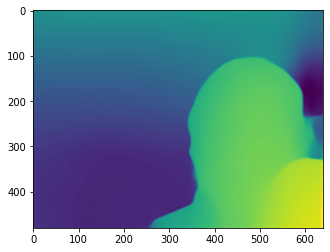

[[452.07806 451.83087 451.334   ...   0.        0.        0.     ]
 [452.06876 451.40164 450.01062 ...   0.        0.        0.     ]
 [452.5837  450.86362 447.21054 ...   0.        0.        0.     ]
 ...
 [194.62561 194.85071 195.78058 ... 981.3515  973.76746 971.6541 ]
 [193.1161  193.38297 194.25647 ... 980.9056  972.57043 970.2334 ]
 [192.48697 192.78828 193.67532 ... 980.8893  972.02856 969.50525]]


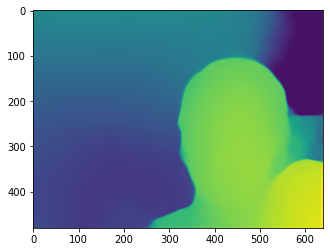

[[ 420.98895  420.92142  420.76804 ...    0.         0.         0.     ]
 [ 421.094    420.57562  419.4586  ...    0.         0.         0.     ]
 [ 421.79718  420.16336  416.64075 ...    0.         0.         0.     ]
 ...
 [ 210.703    210.91827  211.67245 ... 1062.6483  1054.474   1052.2135 ]
 [ 209.06711  209.27454  209.87471 ... 1062.1261  1052.9507  1050.3645 ]
 [ 208.35057  208.57356  209.15125 ... 1062.0826  1052.2524  1049.427  ]]


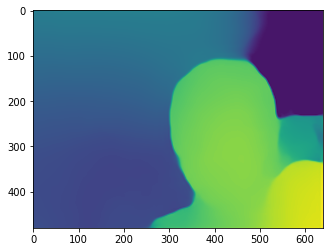

[[ 457.50006  457.43628  457.3451  ...    0.         0.         0.     ]
 [ 457.5151   456.9458   455.77057 ...    0.         0.         0.     ]
 [ 458.10947  456.2938   452.42636 ...    0.         0.         0.     ]
 ...
 [ 205.76799  205.95308  206.6852  ... 1023.27527 1014.46344 1011.886  ]
 [ 204.19136  204.3771   204.97147 ... 1023.2887  1014.12256 1011.5163 ]
 [ 203.50471  203.71353  204.30031 ... 1023.52594 1014.0149  1011.31213]]


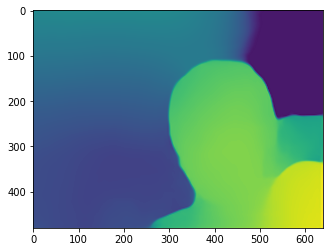

[[ 390.08087  389.9401   389.6855  ...    0.         0.         0.     ]
 [ 389.911    389.3939   388.32758 ...    0.         0.         0.     ]
 [ 390.0248   388.563    385.44193 ...    0.         0.         0.     ]
 ...
 [ 169.16208  169.58102  170.75941 ... 1108.5919  1099.2599  1096.5171 ]
 [ 167.60245  168.09059  169.27618 ... 1108.2019  1097.8909  1094.8436 ]
 [ 166.92258  167.45616  168.6788  ... 1108.2382  1097.272   1093.9901 ]]


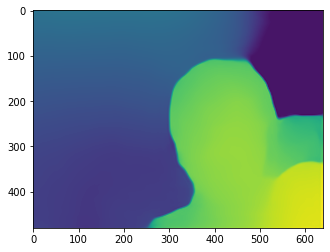

[[ 285.3106   284.69318  283.5131  ...    0.         0.         0.     ]
 [ 285.26282  284.4801   282.94025 ...    0.         0.         0.     ]
 [ 285.7671   284.50378  281.9163  ...    0.         0.         0.     ]
 ...
 [ 169.19681  169.1936   169.44035 ... 1046.6212  1037.5637  1034.8466 ]
 [ 168.12302  168.16599  168.39331 ... 1044.4163  1034.5078  1031.5421 ]
 [ 167.6793   167.75307  167.99786 ... 1043.6423  1033.1617  1029.9993 ]]


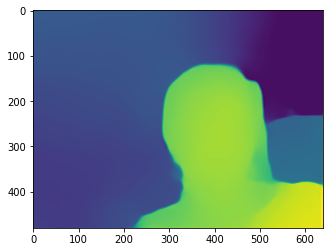

[[ 310.2821   309.61963  308.3413  ...    0.         0.         0.     ]
 [ 310.0244   309.2146   307.61548 ...    0.         0.         0.     ]
 [ 309.99265  308.7487   306.20163 ...    0.         0.         0.     ]
 ...
 [ 158.67758  158.77226  159.25813 ... 1016.5161  1004.6154  1000.21985]
 [ 157.31627  157.48952  158.01598 ... 1014.9055   998.61865  992.38   ]
 [ 156.74953  156.96596  157.52928 ... 1014.359    995.8704   988.69073]]


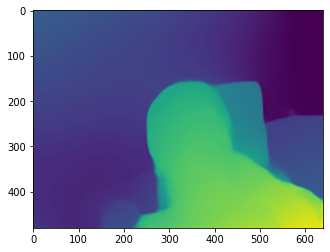

[[341.14038 341.0271  340.83707 ...   0.        0.        0.     ]
 [341.45496 341.01813 340.14822 ...   0.        0.        0.     ]
 [342.6169  341.36908 338.78397 ...   0.        0.        0.     ]
 ...
 [166.67416 166.66354 166.91422 ... 678.7704  674.7038  673.69403]
 [166.01009 166.0222  166.22742 ... 676.8677  671.92377 670.6049 ]
 [165.75745 165.78932 165.998   ... 676.1974  670.73645 669.2227 ]]


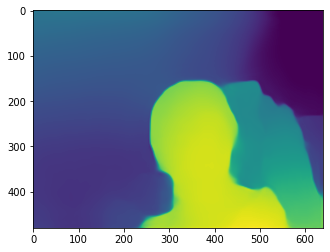

[[422.06232 421.392   420.0805  ...   0.        0.        0.     ]
 [421.57922 420.64252 418.76178 ...   0.        0.        0.     ]
 [421.20383 419.5448  416.10858 ...   0.        0.        0.     ]
 ...
 [160.20682 160.53287 161.44911 ... 871.5549  860.35754 855.7154 ]
 [158.91089 159.27953 160.16504 ... 870.7362  855.408   849.03076]
 [158.32867 158.73305 159.64476 ... 870.5314  853.17365 845.92487]]


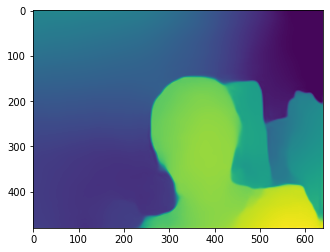

[[367.6905   367.47876  367.09653  ...   0.         0.         0.      ]
 [367.70624  367.1493   366.0329   ...   0.         0.         0.      ]
 [368.2811   366.8546   363.8772   ...   0.         0.         0.      ]
 ...
 [127.22338  127.298546 127.607635 ... 949.44635  939.0695   934.9678  ]
 [126.044205 126.24676  126.764244 ... 947.3472   932.54877  926.56573 ]
 [125.550125 125.81276  126.430115 ... 946.46124  929.48285  922.55054 ]]


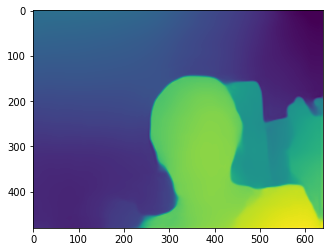

[[341.49078  340.94504  339.8772   ... 123.78728  113.72439  108.95239 ]
 [341.3717   340.60226  339.0517   ... 125.93535  116.9377   112.69523 ]
 [341.69394  340.3135   337.4381   ... 130.4744   123.73566  120.618744]
 ...
 [126.902725 127.047745 127.56246  ... 984.138    975.25085  972.4936  ]
 [126.02337  126.21173  126.734055 ... 983.55334  973.24677  969.9762  ]
 [125.64397  125.86273  126.41433  ... 983.4038   972.25464  968.65845 ]]


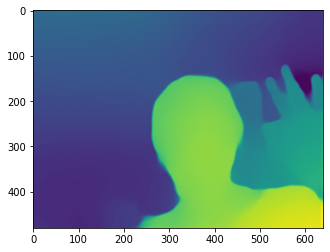

[[402.5051  402.33047 402.04947 ... 247.53844 228.02011 218.68837]
 [402.4126  401.83157 400.67508 ... 253.07881 235.7905  227.59236]
 [402.74548 401.1533  397.80542 ... 264.81958 252.21571 246.40749]
 ...
 [158.3663  158.54753 159.27321 ... 982.7279  974.172   971.6086 ]
 [157.16975 157.42429 158.1883  ... 981.7109  972.248   969.38586]
 [156.66377 156.96321 157.77196 ... 981.39044 971.31415 968.2236 ]]


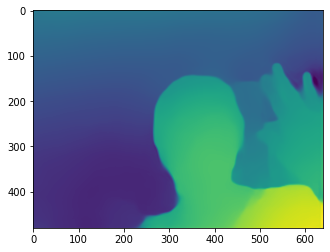

[[ 474.87613   474.57852   473.99332  ...  125.87302   117.89123
   114.00857 ]
 [ 474.53714   473.83762   472.3951   ...  127.14031   119.96049
   116.5013  ]
 [ 474.39346   472.67664   469.04547  ...  129.84785   124.243256
   121.622375]
 ...
 [ 117.67298   117.76355   118.06795  ... 1012.1485   1003.64
  1001.15326 ]
 [ 116.90228   117.08602   117.52232  ... 1010.92975  1001.58685
   998.8398  ]
 [ 116.581696  116.81356   117.32463  ... 1010.57385  1000.64325
   997.68317 ]]


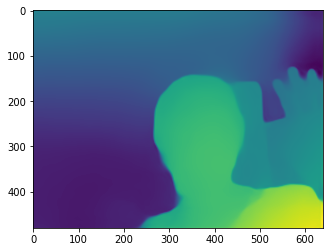

[[382.94244   382.60638   381.95724   ...   6.5536017   5.4741592
    5.04131  ]
 [382.9966    382.3506    381.0388    ...   5.9968243   5.2168303
    4.910137 ]
 [383.68076   382.23068   379.18802   ...   4.9852858   4.8737335
    4.849103 ]
 ...
 [127.286835  127.30288   127.50661   ... 992.94305   983.8269
  981.0773   ]
 [126.55332   126.664856  127.00259   ... 993.2709    983.7054
  980.893    ]
 [126.26064   126.42205   126.83702   ... 993.63983   983.6676
  980.736    ]]


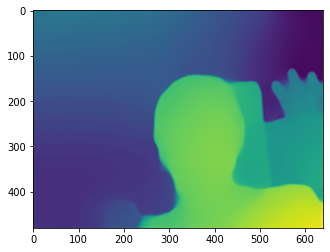

[[ 435.2204    434.616     433.39575  ...   46.109837   43.965725
    42.84014 ]
 [ 434.72873   433.82352   431.95428  ...   46.91835    44.986046
    43.987705]
 [ 434.2942    432.5847    428.96848  ...   48.770187   47.261715
    46.524998]
 ...
 [ 177.98514   177.97466   178.23125  ... 1032.7842   1023.7374
  1021.0133  ]
 [ 176.8343    176.87672   177.1154   ... 1032.138    1021.64685
  1018.406   ]
 [ 176.35484   176.42984   176.68411  ... 1031.9949   1020.6384
  1017.06616 ]]


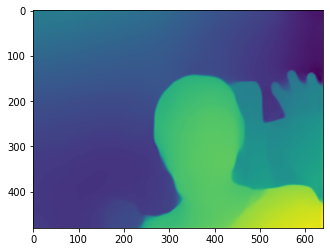

[[416.99982  416.87393  416.63406  ...  28.88598   27.233644  26.398283]
 [416.84747  416.31705  415.20676  ...  28.50425   27.298027  26.696396]
 [417.11185  415.559    412.23282  ...  27.992119  27.780867  27.700426]
 ...
 [120.05258  120.31753  121.03244  ... 935.4729   927.9702   925.8226  ]
 [119.13632  119.49081  120.31788  ... 934.7248   926.3898   923.9722  ]
 [118.705345 119.114334 120.024254 ... 934.5612   925.67017  923.0477  ]]


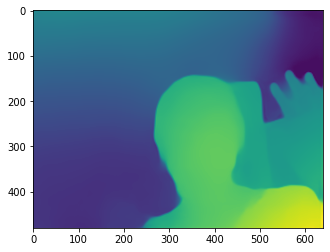

[[ 416.93256   416.73502   416.38138  ...   65.802666   61.748528
    59.686523]
 [ 416.7802    416.20816   415.0558   ...   66.78672    63.146675
    61.31867 ]
 [ 416.97137   415.46143   412.2942   ...   68.862656   66.04776
    64.694626]
 ...
 [ 108.39387   108.67236   109.36891  ... 1076.3783   1067.0016
  1064.1965  ]
 [ 107.69105   108.04308   108.84131  ... 1075.526    1063.9722
  1060.3271  ]
 [ 107.370445  107.76132   108.617424 ... 1075.334    1062.574
  1058.4464  ]]


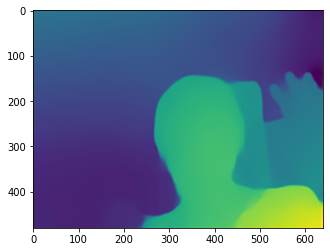

[[ 346.14435   345.85846   345.3272   ...   23.471266   21.49952
    20.581001]
 [ 346.09662   345.52097   344.3628   ...   23.547451   21.92329
    21.165485]
 [ 346.53198   345.20398   342.40872  ...   23.829905   22.984781
    22.588537]
 ...
 [ 115.92733   116.060616  116.5179   ... 1036.6239   1027.4811
  1024.7921  ]
 [ 115.31402   115.54089   116.15051  ... 1036.0891   1026.0232
  1023.0469  ]
 [ 115.06138   115.333916  116.018074 ... 1036.0901   1025.3975
  1022.19666 ]]


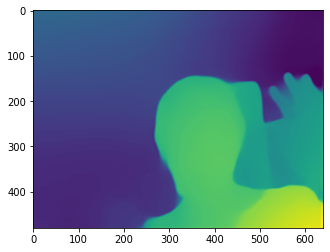

[[ 428.67786   428.34885   427.729    ...  123.4309    113.897995
   109.34033 ]
 [ 428.33603   427.61795   426.1443   ...  124.857635  116.16561
   112.01833 ]
 [ 428.21497   426.49976   422.8254   ...  127.67226   120.71518
   117.409195]
 ...
 [  99.95571    99.95476   100.05058  ... 1074.2211   1064.7594
  1061.9515  ]
 [  99.28566    99.407364   99.72745  ... 1073.2584   1062.5494
  1059.3077  ]
 [  99.00211    99.182594   99.61091  ... 1073.0565   1061.5658
  1058.0289  ]]


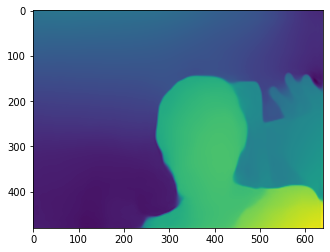

[[ 374.68155  374.2164   373.2773  ...    0.         0.         0.     ]
 [ 374.66675  373.90622  372.33432 ...    0.         0.         0.     ]
 [ 375.25143  373.70987  370.4524  ...    0.         0.         0.     ]
 ...
 [ 137.88419  138.16322  139.00189 ... 1081.1249  1071.8691  1069.189  ]
 [ 136.96803  137.30309  138.15433 ... 1080.4307  1070.3508  1067.431  ]
 [ 136.58978  136.96284  137.84943 ... 1080.3334  1069.6572  1066.5281 ]]


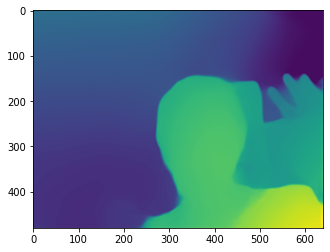

[[ 350.44543   350.08096   349.39716  ...   72.19839    65.89976
    62.93644 ]
 [ 350.26785   349.6493    348.422    ...   72.856285   67.45389
    64.891235]
 [ 350.44012   349.15128   346.48114  ...   74.071075   70.60425
    68.89154 ]
 ...
 [ 146.13876   146.39714   147.218    ... 1118.1931   1108.5315
  1105.6636  ]
 [ 145.08015   145.39676   146.23985  ... 1117.7601   1106.3163
  1102.7855  ]
 [ 144.62482   144.9797    145.86134  ... 1117.7854   1105.3156
  1101.3828  ]]


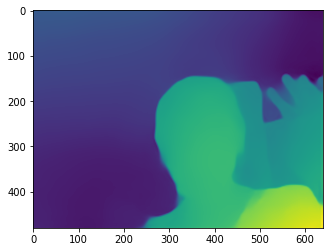

[[ 368.68478   368.57684   368.39322  ...   79.99091    74.07936
    71.27792 ]
 [ 368.67648   368.23492   367.32968  ...   80.527626   75.1484
    72.60251 ]
 [ 369.1082    367.8219    365.07803  ...   81.54181    77.26793
    75.24801 ]
 ...
 [  92.18985    92.28757    92.585556 ... 1065.7428   1056.0753
  1053.1216  ]
 [  91.59994    91.79638    92.26957  ... 1065.7861   1054.118
  1050.4066  ]
 [  91.341194   91.58576    92.145355 ... 1066.0177   1053.2294
  1049.075   ]]


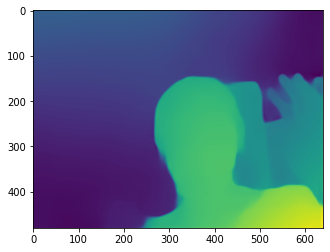

[[ 368.7589    368.4554    367.86203  ...  106.91777    99.310394
    95.6641  ]
 [ 368.75333   368.1274    366.84482  ...  108.747314  101.894005
    98.634476]
 [ 369.26843   367.8208    364.77017  ...  112.49548   107.17575
   104.710754]
 ...
 [ 117.00485   117.257996  117.94148  ... 1101.7754   1091.8243
  1088.6877  ]
 [ 116.14786   116.48955   117.29241  ... 1100.5933   1087.3934
  1082.9342  ]
 [ 115.795685  116.18021   117.0423   ... 1100.2      1085.314
  1080.1521  ]]


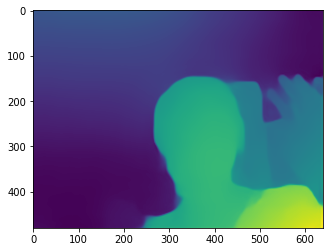

[[ 289.191     288.7522    287.88736  ...  102.11532    94.255775
    90.525246]
 [ 289.35693   288.6874    287.32666  ...  103.753044   96.72682
    93.40754 ]
 [ 290.2424    288.95386   286.25638  ...  107.1208    101.834656
    99.37792 ]
 ...
 [ 146.76035   147.03445   147.88083  ... 1120.7725   1111.6216
  1108.9596  ]
 [ 145.83998   146.13658   146.9214   ... 1119.5161   1107.6917
  1103.9578  ]
 [ 145.45198   145.77127   146.55884  ... 1119.1698   1105.9211
  1101.6016  ]]


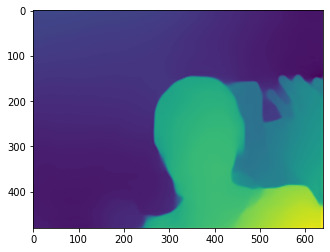

[[ 371.0946    370.70062   369.9426   ...   22.604065   21.277712
    20.541403]
 [ 370.91003   370.22495   368.83325  ...   22.742672   21.634783
    21.018421]
 [ 371.0814    369.6337    366.5743   ...   23.056986   22.396101
    22.030182]
 ...
 [ 144.62927   144.56084   144.60248  ... 1063.7739   1054.9021
  1052.27    ]
 [ 143.91556   143.90076   143.96771  ... 1063.0048   1051.9192
  1048.4055  ]
 [ 143.6253    143.64064   143.73486  ... 1062.861    1050.5643
  1046.5536  ]]


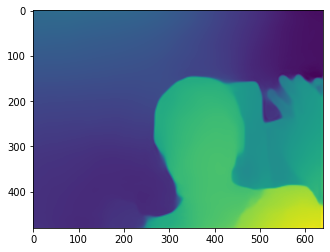

[[ 321.91986   321.55386   320.84555  ...   69.02463    63.3596
    60.69683 ]
 [ 321.89163   321.30078   320.11383  ...   69.52209    64.29883
    61.855103]
 [ 322.33112   321.14368   318.6776   ...   70.38659    66.04633
    64.041   ]
 ...
 [ 112.66898   112.82317   113.24842  ... 1039.47     1030.2378
  1027.4249  ]
 [ 111.87968   112.1372    112.727806 ... 1039.5708   1028.3689
  1024.7976  ]
 [ 111.53589   111.848694  112.533005 ... 1039.8346   1027.5365
  1023.5266  ]]


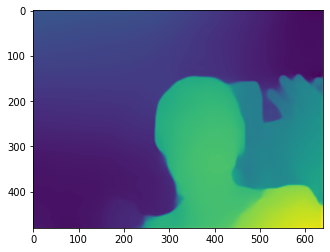

[[ 399.7877    399.4245    398.67407  ...   91.80969    85.038055
    81.84731 ]
 [ 399.575     398.89636   397.4714   ...   92.80096    86.802666
    83.98133 ]
 [ 399.7197    398.21722   395.01685  ...   94.75565    90.45129
    88.435745]
 ...
 [ 117.2288    117.32504   117.66012  ... 1094.9086   1085.1189
  1082.191   ]
 [ 116.70215   116.88012   117.348335 ... 1094.1691   1082.4458
  1078.7925  ]
 [ 116.47778   116.69986   117.24418  ... 1094.0304   1081.209
  1077.1243  ]]


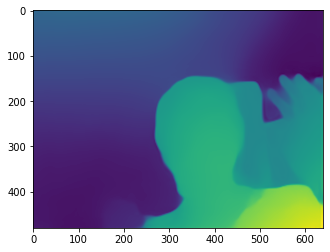

[[ 327.64618   327.35028   326.74286  ...   37.33964    34.166435
    32.718575]
 [ 327.72995   327.1729    326.0199   ...   37.447308   34.765682
    33.532455]
 [ 328.37146   327.14      324.56473  ...   37.634205   36.002388
    35.222565]
 ...
 [ 141.34422   141.55017   142.19868  ... 1116.2258   1106.7524
  1103.941   ]
 [ 140.47849   140.73756   141.40465  ... 1115.0728   1103.2523
  1099.5164  ]
 [ 140.10864   140.4054    141.11385  ... 1114.798    1101.6969
  1097.4412  ]]


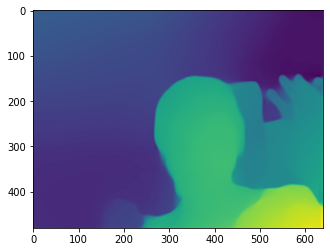

[[ 368.59204   368.0977    367.11578  ...   24.643497   23.591047
    22.952875]
 [ 368.48422   367.71826   366.1581   ...   24.848907   23.982815
    23.456636]
 [ 368.8471    367.36185   364.26117  ...   25.340147   24.864233
    24.577082]
 ...
 [ 128.02718   128.29381   129.09515  ... 1115.2942   1105.7908
  1102.9744  ]
 [ 127.070114  127.38994   128.21574  ... 1114.3097   1102.3574
  1098.5643  ]
 [ 126.63495   126.991356  127.85785  ... 1114.0573   1100.7742
  1096.4354  ]]


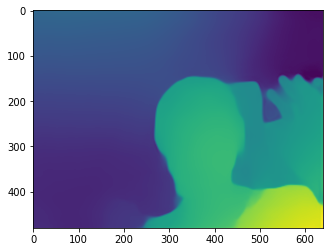

[[ 441.72745   441.59943   441.3606   ...   59.22886    53.939816
    51.51202 ]
 [ 441.5553    440.9678    439.74448  ...   59.417164   54.90515
    52.818275]
 [ 441.79413   440.0609    436.36444  ...   59.72715    56.861973
    55.485634]
 ...
 [ 136.87906   136.73537   136.62086  ... 1049.0065   1040.3337
  1037.8049  ]
 [ 136.27692   136.19302   136.136    ... 1048.0696   1037.4608
  1034.186   ]
 [ 136.04648   135.9933    135.97237  ... 1047.8203   1036.131
  1032.423   ]]


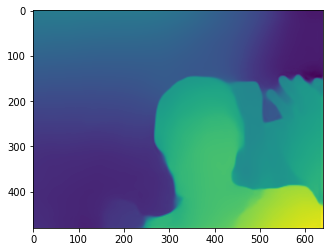

[[363.7856   363.5946   363.27917  ...  20.1442    19.35524   18.894459]
 [363.87485  363.30984  362.1834   ...  20.168081  19.539225  19.167017]
 [364.54953  363.04742  359.8768   ...  20.251177  19.97275   19.794884]
 ...
 [158.8515   159.30304  160.51906  ... 987.651    979.9312   977.76355 ]
 [157.53644  158.04489  159.2568   ... 986.5216   977.4927   974.8534  ]
 [156.93823  157.48903  158.73898  ... 986.1546   976.3395   973.39716 ]]


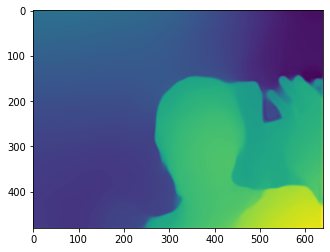

[[ 365.0389    364.77847   364.29892  ...   70.0243     64.75546
    62.261684]
 [ 365.0455    364.46478   363.3083   ...   70.56715    65.75298
    63.477364]
 [ 365.56183   364.1734    361.29907  ...   71.62448    67.73658
    65.902054]
 ...
 [ 163.03647   163.20512   163.8825   ... 1132.3785   1123.5139
  1121.0441  ]
 [ 161.79764   162.02643   162.71251  ... 1130.436    1118.8798
  1115.3254  ]
 [ 161.26784   161.53362   162.24666  ... 1129.7802   1116.782
  1112.6328  ]]


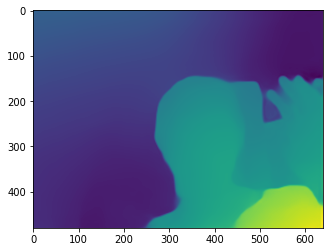

[[ 367.12085   366.9143    366.52127  ...   76.080826   70.41697
    67.732895]
 [ 367.09177   366.56122   365.48355  ...   76.76742    71.62672
    69.19084 ]
 [ 367.54388   366.19318   363.3701   ...   78.15047    74.12049
    72.2082  ]
 ...
 [ 133.23001   133.36615   133.82654  ... 1064.0665   1054.9944
  1052.3472  ]
 [ 132.53268   132.74771   133.31944  ... 1063.4598   1053.3652
  1050.3849  ]
 [ 132.22963   132.488     133.12816  ... 1063.4388   1052.6843
  1049.4634  ]]


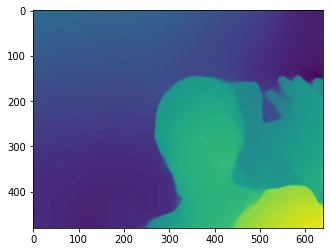

[[ 413.00366   412.82474   412.52216  ...   33.624573   30.916561
    29.651735]
 [ 412.82236   412.25684   411.12613  ...   33.64355    31.37321
    30.303448]
 [ 413.03174   411.4922    408.2625   ...   33.65213    32.314354
    31.655857]
 ...
 [ 110.1434    110.32908   110.85806  ... 1014.60583  1006.3365
  1003.9106  ]
 [ 109.50466   109.75075   110.349045 ... 1012.683    1002.10913
   998.77435 ]
 [ 109.20951   109.48979   110.134384 ... 1011.9245   1000.1071
   996.2662  ]]


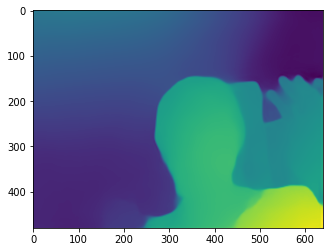

[[410.13037 410.09363 410.0502  ...   0.        0.        0.     ]
 [410.03607 409.55692 408.55978 ...   0.        0.        0.     ]
 [410.37314 408.7951  405.4124  ...   0.        0.        0.     ]
 ...
 [159.7501  160.01884 160.87172 ... 993.8072  985.03973 982.41815]
 [158.55258 158.89784 159.80624 ... 993.4541  983.82214 980.9294 ]
 [158.037   158.42609 159.38184 ... 993.5049  983.2847  980.18024]]


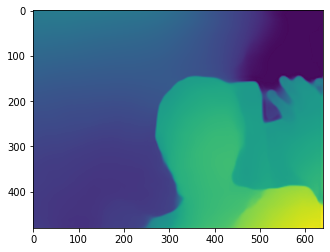

[[ 407.14877   406.90015   406.44647  ...   33.753494   32.535137
    31.835764]
 [ 407.09598   406.45605   405.16888  ...   34.090733   33.046356
    32.45736 ]
 [ 407.52185   405.90198   402.51416  ...   34.88431    34.19529
    33.837513]
 ...
 [ 146.90886   146.84918   147.0006   ... 1042.8716   1033.9705
  1031.3682  ]
 [ 145.79599   145.82031   146.05077  ... 1042.0063   1031.8665
  1028.8242  ]
 [ 145.3268    145.39638   145.682    ... 1041.8423   1030.9395
  1027.606   ]]


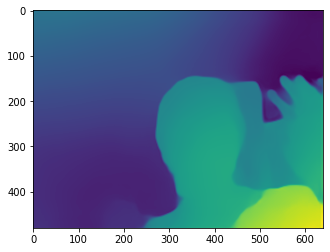

[[451.29578 451.00644 450.4165  ...   0.        0.        0.     ]
 [451.15988 450.45264 448.96533 ...   0.        0.        0.     ]
 [451.4883  449.71634 445.92392 ...   0.        0.        0.     ]
 ...
 [195.4379  195.45491 195.79866 ... 915.0232  907.0418  904.7014 ]
 [193.85147 193.89667 194.16241 ... 914.3079  905.79395 903.3307 ]
 [193.17624 193.24788 193.51357 ... 914.2754  905.3912  902.81555]]


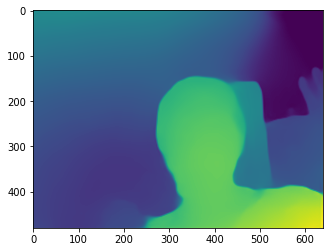

[[ 467.2203   466.90192  466.27847 ...    0.         0.         0.     ]
 [ 466.98837  466.26453  464.76898 ...    0.         0.         0.     ]
 [ 467.08258  465.3248   461.5878  ...    0.         0.         0.     ]
 ...
 [ 212.05652  212.1576   212.72388 ... 1055.7511  1046.8076  1044.2477 ]
 [ 210.45445  210.56967  211.01819 ... 1054.1047  1044.6178  1041.9489 ]
 [ 209.746    209.88808  210.33308 ... 1053.6953  1043.8218  1041.0419 ]]


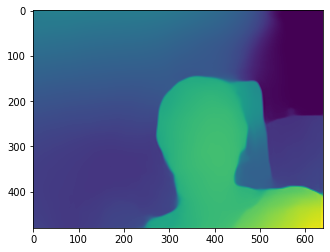

[[ 430.9301    430.8384    430.6821   ...    0.          0.
     0.      ]
 [ 430.9454    430.4173    429.32474  ...    0.          0.
     0.      ]
 [ 431.51782   429.90515   426.46887  ...    0.          0.
     0.      ]
 ...
 [ 125.16087   125.335945  125.84121  ... 1127.8596   1118.6102
  1116.0199  ]
 [ 124.30801   124.566826  125.186775 ... 1125.4113   1114.7405
  1111.645   ]
 [ 123.953094  124.25799   124.94897  ... 1124.6172   1113.0977
  1109.6824  ]]


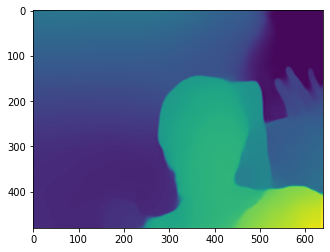

[[ 346.47354   346.09628   345.3904   ...  103.45263    93.914795
    89.41188 ]
 [ 346.4623    345.79758   344.4728   ...  104.69524    96.15937
    92.13029 ]
 [ 346.91742   345.51297   342.58673  ...  107.24386   100.775536
    97.71155 ]
 ...
 [ 133.61565   133.89545   134.70624  ... 1156.1829   1146.8949
  1144.2616  ]
 [ 132.7073    133.0684    133.96835  ... 1154.5925   1143.7218
  1140.508   ]
 [ 132.31735   132.72314   133.6814   ... 1154.1199   1142.3153
  1138.7394  ]]


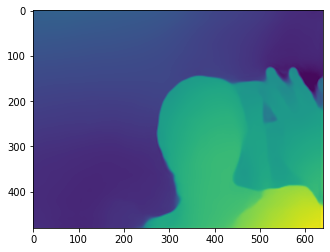

[[ 427.43353   427.30762   427.03116  ...  138.89638   126.683556
   120.95155 ]
 [ 427.4678    426.88943   425.63977  ...  140.37268   129.13708
   123.89094 ]
 [ 428.06525   426.36197   422.67493  ...  143.36676   134.0906
   129.8224  ]
 ...
 [ 152.58305   152.88025   153.77979  ... 1130.1104   1120.6196
  1117.8816  ]
 [ 151.62865   152.00485   152.96584  ... 1129.522    1119.0769
  1116.0425  ]
 [ 151.24356   151.66624   152.68022  ... 1129.5437   1118.4534
  1115.1886  ]]


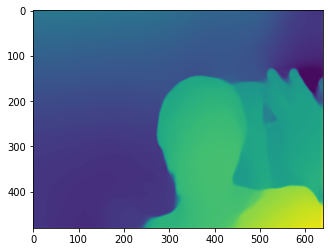

[[ 465.7425    465.28238   464.3181   ...   45.176674   41.930332
    40.441856]
 [ 465.3177    464.52295   462.85236  ...   45.231293   42.649796
    41.463898]
 [ 465.10883   463.43137   459.88074  ...   45.516685   44.407276
    43.89036 ]
 ...
 [ 161.61368   161.91273   162.85109  ... 1182.7518   1172.7089
  1169.815   ]
 [ 160.39587   160.74976   161.6831   ... 1181.4073   1169.7568
  1166.2805  ]
 [ 159.88751   160.2766    161.23264  ... 1181.1113   1168.5072
  1164.6656  ]]


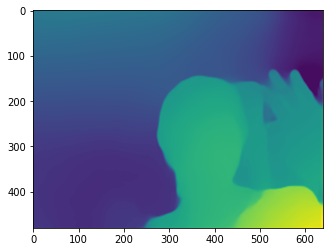

[[ 296.26764    296.01498    295.5365    ...    5.620028     4.7103643
     4.382928 ]
 [ 296.44824    295.91327    294.82895   ...    5.0659194    4.4478235
     4.240832 ]
 [ 297.3181     296.0598     293.41617   ...    4.0237527    4.0885897
     4.166852 ]
 ...
 [ 131.09128    131.37833    132.15062   ... 1037.9677    1029.0016
  1026.356    ]
 [ 130.16513    130.54187    131.42764   ... 1037.5696    1027.6628
  1024.7184   ]
 [ 129.75182    130.17952    131.14041   ... 1037.6475    1027.1184
  1023.94995  ]]


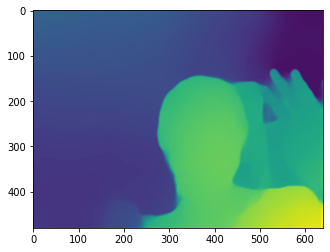

[[ 420.66605   420.3968    419.85858  ...   45.457874   41.78958
    40.08238 ]
 [ 420.4689    419.8034    418.4116   ...   45.859154   42.793095
    41.365067]
 [ 420.60858   418.9416    415.3773   ...   46.83247    45.12712
    44.32724 ]
 ...
 [ 142.99065   143.28346   144.09848  ... 1104.9775   1095.8373
  1093.2157  ]
 [ 141.90448   142.28056   143.1935   ... 1104.0459   1093.754
  1090.7361  ]
 [ 141.4431    141.8652    142.84213  ... 1103.8641   1092.8356
  1089.5405  ]]


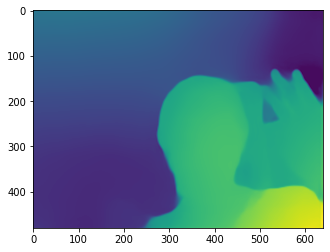

[[ 461.2536    460.98978   460.46106  ...   85.5004     80.33129
    77.79674 ]
 [ 460.9347    460.22772   458.74527  ...   86.814316   82.191475
    79.95299 ]
 [ 460.85455   459.0367    455.14508  ...   89.84492    86.24843
    84.58422 ]
 ...
 [ 136.87476   137.13312   137.85577  ... 1108.8103   1099.8853
  1097.3615  ]
 [ 135.9996    136.3133    137.0677   ... 1107.3467   1096.707
  1093.5305  ]
 [ 135.61604   135.964     136.75436  ... 1106.9271   1095.2946
  1091.7239  ]]


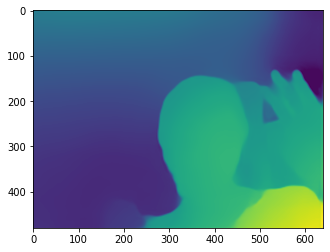

[[ 461.40146   461.06354   460.40985  ...   96.206924   87.681885
    83.660866]
 [ 461.03073   460.26013   458.66776  ...   97.20022    89.57505
    85.97595 ]
 [ 460.80527   458.93994   454.95438  ...   99.20555    93.41617
    90.66475 ]
 ...
 [ 169.77676   169.96335   170.61342  ... 1130.7677   1121.5804
  1118.9741  ]
 [ 168.61052   168.83398   169.44733  ... 1129.0399   1118.1938
  1114.9641  ]
 [ 168.1132    168.36603   168.99353  ... 1128.5251   1116.7122
  1113.1018  ]]


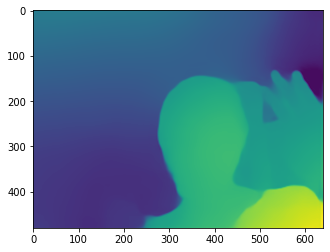

[[ 483.24554   482.92236   482.287    ...   49.85756    47.401554
    46.192192]
 [ 483.15604   482.38892   480.81067  ...   50.490425   48.339066
    47.295345]
 [ 483.5585    481.6776    477.7171   ...   52.04036    50.46321
    49.743553]
 ...
 [ 141.54294   141.87364   142.79253  ... 1064.5532   1055.6925
  1053.1323  ]
 [ 140.32167   140.73004   141.70554  ... 1063.5583   1053.5931
  1050.6516  ]
 [ 139.78143   140.23557   141.2612   ... 1063.4072   1052.7428
  1049.5393  ]]


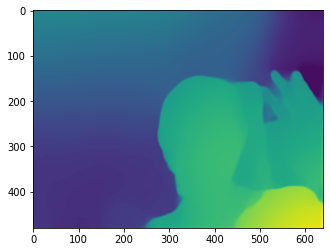

[[ 417.0138    416.63727   415.893    ...   42.501694   39.442036
    38.05293 ]
 [ 416.67218   415.9827    414.55875  ...   42.67486    40.210854
    39.092278]
 [ 416.49634   414.9851    411.76453  ...   43.198185   42.015015
    41.479683]
 ...
 [ 164.76418   165.10564   166.12604  ... 1190.1047   1180.3918
  1177.6207  ]
 [ 163.45624   163.82831   164.77391  ... 1188.5051   1176.8112
  1173.282   ]
 [ 162.88962   163.29207   164.24406  ... 1188.077    1175.261
  1171.2853  ]]


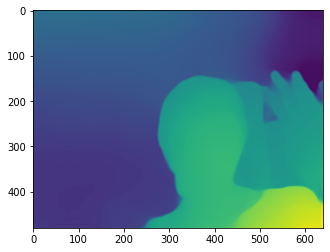

[[ 397.44318  397.22754  396.82132 ...  155.19823  141.58911  135.15887]
 [ 397.41864  396.80502  395.5467  ...  157.13597  144.63321  138.75287]
 [ 397.90396  396.29767  392.9006  ...  160.98721  150.74207  145.97939]
 ...
 [ 134.96619  135.21205  135.97708 ... 1089.5658  1080.4823  1077.8801 ]
 [ 134.13942  134.44077  135.23315 ... 1088.1735  1078.2228  1075.3533 ]
 [ 133.79257  134.1287   134.95601 ... 1087.8333  1077.2866  1074.2048 ]]


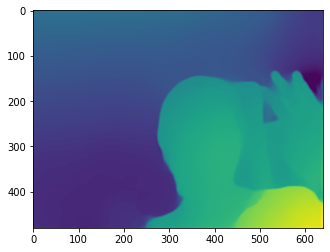

[[ 385.39462  385.17105  384.76068 ...    0.         0.         0.     ]
 [ 385.20505  384.64594  383.51324 ...    0.         0.         0.     ]
 [ 385.37668  383.95602  380.95575 ...    0.         0.         0.     ]
 ...
 [ 153.82237  153.88155  154.28064 ... 1095.3047  1086.3352  1083.762  ]
 [ 152.79547  152.88875  153.25996 ... 1093.9255  1083.5327  1080.444  ]
 [ 152.36377  152.48376  152.87015 ... 1093.5371  1082.2881  1078.8691 ]]


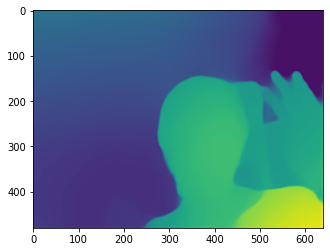

[[ 410.95322   410.41672   409.31415  ...   28.578333   26.405128
    25.376644]
 [ 410.8191    409.97653   408.22913  ...   28.275341   26.606676
    25.81662 ]
 [ 411.1505    409.50827   406.06238  ...   27.839142   27.298437
    27.0396  ]
 ...
 [  99.711945   99.84556   100.22599  ... 1084.4419   1075.5654
  1073.0461  ]
 [  99.11514    99.335205   99.840645 ... 1083.051    1072.8861
  1069.9108  ]
 [  98.87012    99.13133    99.696815 ... 1082.7148   1071.7615
  1068.4878  ]]


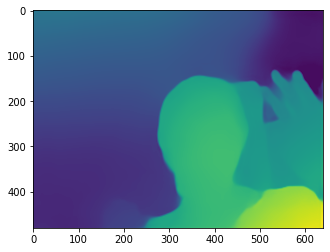

[[ 367.80087   367.58246   367.1441   ...  107.559586   97.85278
    93.25858 ]
 [ 368.0085    367.44904   366.2897   ...  108.690636   99.94094
    95.80088 ]
 [ 368.9593    367.54065   364.55167  ...  111.00198   104.179504
   100.93985 ]
 ...
 [ 156.81918   156.99287   157.67426  ... 1162.1354   1152.647
  1149.9108  ]
 [ 155.97357   156.20586   156.90997  ... 1160.0981   1148.4272
  1144.8364  ]
 [ 155.62598   155.89662   156.63927  ... 1159.426    1146.5437
  1142.4631  ]]


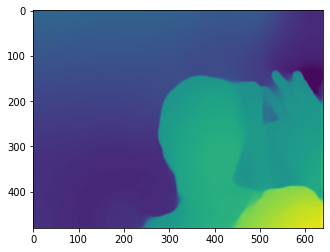

[[ 447.71603   447.17926   446.1031   ...   94.33414    86.50471
    82.756836]
 [ 447.24316   446.3944    444.64163  ...   95.257      88.39399
    85.09443 ]
 [ 446.85056   445.1733    441.61005  ...   97.046936   92.24895
    89.88818 ]
 ...
 [ 154.4591    154.45172   154.67595  ... 1158.5824   1148.8657
  1146.0771  ]
 [ 153.35426   153.42819   153.72745  ... 1157.531    1146.4158
  1143.1307  ]
 [ 152.89343   153.01125   153.36284  ... 1157.3788   1145.4127
  1141.8063  ]]


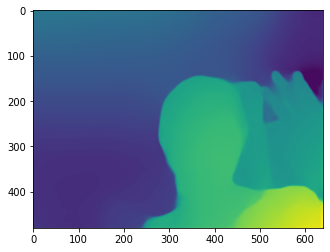

[[ 442.5398    442.26752   441.73633  ...   39.54932    37.04753
    35.871864]
 [ 442.38718   441.7026    440.29257  ...   39.04193    37.28369
    36.453762]
 [ 442.6757    440.94855   437.29993  ...   38.20009    38.086597
    38.01924 ]
 ...
 [ 191.45056   191.50629   191.95601  ... 1097.61     1087.7249
  1084.7411  ]
 [ 190.12045   190.20888   190.59056  ... 1097.1498   1085.3477
  1081.6527  ]
 [ 189.55052   189.66643   190.05005  ... 1097.2073   1084.33
  1080.218   ]]


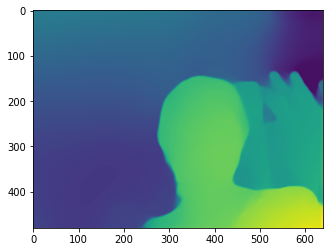

[[ 415.85748   415.66412   415.29764  ...  118.55836   109.29711
   104.911476]
 [ 415.6744    415.08853   413.87787  ...  119.58999   111.083786
   107.06959 ]
 [ 415.8366    414.2638    410.9136   ...  121.574776  114.62198
   111.36743 ]
 ...
 [ 150.05072   150.10847   150.44655  ... 1108.7601   1099.3235
  1096.5787  ]
 [ 149.17957   149.27246   149.58423  ... 1107.4133   1096.8151
  1093.6804  ]
 [ 148.8211    148.94044   149.26663  ... 1107.0946   1095.7627
  1092.3585  ]]


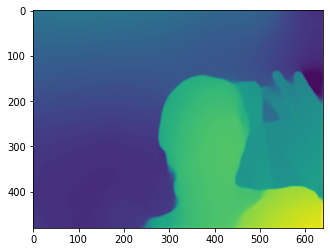

[[ 430.4833   430.36038  430.16187 ...  133.82619  123.2401   118.21223]
 [ 430.36807  429.81223  428.6748  ...  135.89322  126.3447   121.83198]
 [ 430.663    429.0229   425.51746 ...  140.22272  132.83119  129.39465]
 ...
 [ 163.07352  163.34305  164.23746 ... 1121.3435  1112.4653  1110.02   ]
 [ 161.78616  162.10454  162.97362 ... 1119.3394  1109.192   1106.3019 ]
 [ 161.21379  161.56613  162.45296 ... 1118.7341  1107.8092  1104.627  ]]


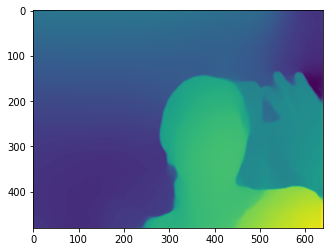

[[ 400.2802    399.9127    399.17175  ...   53.279743   50.21687
    48.688198]
 [ 400.1907    399.5024    398.08224  ...   53.936844   51.219017
    49.88019 ]
 [ 400.54147   399.03113   395.85556  ...   55.376328   53.333885
    52.376312]
 ...
 [ 144.17569   144.3703    144.96756  ... 1112.6268   1103.1366
  1100.3726  ]
 [ 143.49194   143.75003   144.4077   ... 1111.1017   1100.3835
  1097.1992  ]
 [ 143.20221   143.49873   144.2068   ... 1110.7416   1099.265
  1095.8     ]]


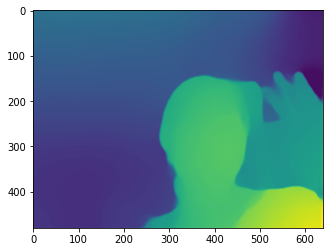

[[ 415.01758   414.6567    413.9471   ...  164.97832   151.6426
   145.29599 ]
 [ 414.79565   414.09067   412.6399   ...  168.24016   156.2795
   150.62993 ]
 [ 414.88373   413.2912    409.91388  ...  175.12239   166.05211
   161.87491 ]
 ...
 [ 122.078995  122.11068   122.289505 ... 1181.3077   1171.7816
  1169.1333  ]
 [ 121.40457   121.5445    121.896454 ... 1179.4796   1168.5796
  1165.4453  ]
 [ 121.12597   121.31722   121.75376  ... 1178.9819   1167.2451
  1163.7949  ]]


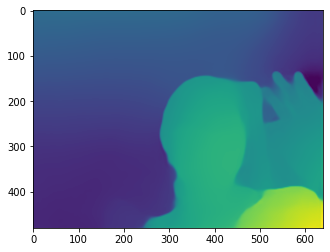

[[ 448.83536   448.36124   447.43835  ...   83.216255   77.40013
    74.578   ]
 [ 448.59033   447.72324   445.9475   ...   83.93613    78.82437
    76.360664]
 [ 448.74835   446.86694   442.8779   ...   85.40998    81.77472
    80.05805 ]
 ...
 [ 113.36585   113.45848   113.80672  ... 1101.5425   1092.6377
  1090.0746  ]
 [ 112.6376    112.79168   113.19321  ... 1100.1766   1089.669
  1086.5096  ]
 [ 112.31207   112.50445   112.95522  ... 1099.801    1088.3632
  1084.8396  ]]


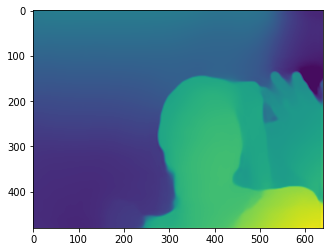

[[ 434.59747   434.21692   433.48633  ...   67.27213    63.232674
    61.255795]
 [ 434.33527   433.58093   432.04547  ...   68.21543    64.53906
    62.77013 ]
 [ 434.38345   432.6743    429.0692   ...   70.345146   67.3234
    65.94891 ]
 ...
 [ 123.081     123.14496   123.391815 ... 1102.9036   1093.8005
  1091.1787  ]
 [ 122.32801   122.494675  122.91036  ... 1101.4425   1090.7361
  1087.5194  ]
 [ 122.03083   122.2486    122.75137  ... 1101.0574   1089.4205
  1085.8407  ]]


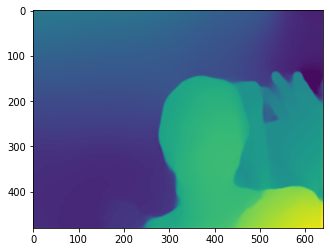

[[ 372.6751    372.41495   371.90762  ...   19.618763   18.29431
    17.646168]
 [ 372.48782   371.9489    370.84183  ...   19.043427   18.162516
    17.72008 ]
 [ 372.60086   371.33417   368.6491   ...   17.959864   18.116493
    18.150496]
 ...
 [ 132.49545   132.70142   133.31206  ... 1124.2411   1114.6328
  1111.866   ]
 [ 131.81017   132.08617   132.78073  ... 1122.891    1111.9586
  1108.7338  ]
 [ 131.51709   131.83197   132.58183  ... 1122.587    1110.8398
  1107.3113  ]]


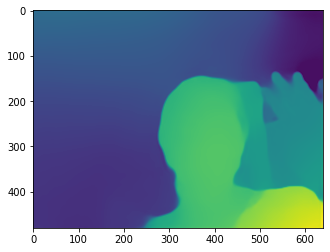

[[ 336.51587   336.16495   335.45908  ...   40.209145   37.84395
    36.64476 ]
 [ 336.4134    335.82      334.59668  ...   40.53421    38.508255
    37.49139 ]
 [ 336.72128   335.48544   332.8807   ...   41.259346   39.936855
    39.303135]
 ...
 [ 139.11525   139.38667   140.15866  ... 1107.9926   1098.7013
  1096.0269  ]
 [ 137.9027    138.251     139.07524  ... 1106.5702   1095.6053
  1092.3027  ]
 [ 137.37761   137.77032   138.64034  ... 1106.2161   1094.283
  1090.6006  ]]


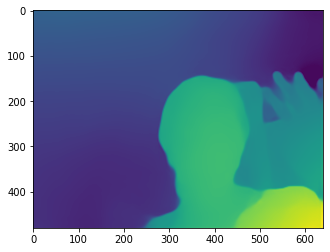

[[ 389.90167   389.55075   388.85794  ...   21.618702   20.015484
    19.274387]
 [ 389.70306   389.07205   387.78778  ...   21.518112   20.236866
    19.64471 ]
 [ 389.83875   388.47256   385.62183  ...   21.452398   20.8908
    20.633139]
 ...
 [ 134.96251   135.24      136.0586   ... 1172.8378   1163.4019
  1160.7335  ]
 [ 134.1208    134.43692   135.24387  ... 1171.2766   1159.9795
  1156.5963  ]
 [ 133.74559   134.0929    134.92787  ... 1170.8765   1158.5115
  1154.7023  ]]


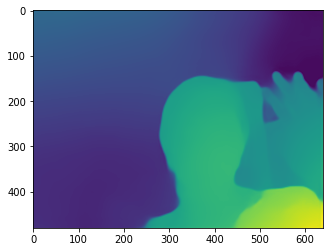

[[ 417.2046    416.87442   416.1845   ...  134.39659   123.959854
   118.98209 ]
 [ 417.04184   416.37454   414.96158  ...  136.37317   126.88377
   122.37817 ]
 [ 417.2535    415.71298   412.41153  ...  140.5462    133.01546
   129.48885 ]
 ...
 [ 137.33714   137.44453   137.84152  ... 1166.3522   1156.2863
  1153.3689  ]
 [ 136.57524   136.77312   137.28853  ... 1165.2031   1153.1663
  1149.5004  ]
 [ 136.26724   136.51344   137.10002  ... 1164.9824   1151.8279
  1147.7211  ]]


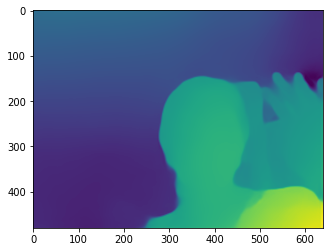

[[ 354.2862    353.97842   353.34528  ...    0.          0.
     0.      ]
 [ 354.291     353.70685   352.48453  ...    0.          0.
     0.      ]
 [ 354.78458   353.4813    350.7112   ...    0.          0.
     0.      ]
 ...
 [ 111.96188   112.089966  112.510315 ... 1142.689    1133.2156
  1130.4829  ]
 [ 111.49891   111.69488   112.218    ... 1141.6724   1130.2924
  1126.8282  ]
 [ 111.31131   111.540855  112.115555 ... 1141.5311   1129.0789
  1125.1884  ]]


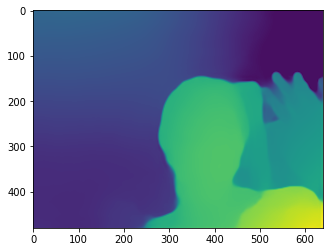

[[ 359.12155   358.6143    357.63055  ...    0.          0.
     0.      ]
 [ 358.99734   358.2283    356.6757   ...    0.          0.
     0.      ]
 [ 359.32358   357.85477   354.7757   ...    0.          0.
     0.      ]
 ...
 [ 121.40137   121.40535   121.5446   ... 1137.0927   1126.9873
  1123.9861  ]
 [ 120.64035   120.743904  121.02743  ... 1137.1324   1125.7971
  1122.3873  ]
 [ 120.32677   120.48247   120.84871  ... 1137.4482   1125.3474
  1121.6582  ]]


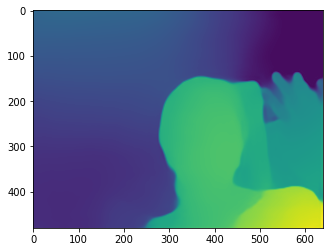

[[ 407.28915   407.0277    406.56027  ...   15.375599   15.06572
    14.874922]
 [ 407.13208   406.48734   405.19437  ...   14.632898   14.583688
    14.526972]
 [ 407.36807   405.75757   402.37308  ...   13.256017   13.776315
    14.012349]
 ...
 [ 126.00068   126.237976  126.86577  ... 1089.41     1080.5924
  1078.0782  ]
 [ 125.02591   125.39314   126.22023  ... 1087.3778   1076.6593
  1073.409   ]
 [ 124.60008   125.03585   125.97607  ... 1086.7303   1074.9484
  1071.2715  ]]


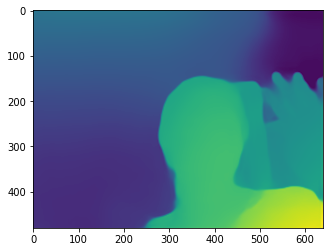

[[ 389.813    389.5718   389.1101  ...    0.         0.         0.     ]
 [ 389.6937   389.10538  387.89612 ...    0.         0.         0.     ]
 [ 389.94214  388.47388  385.35605 ...    0.         0.         0.     ]
 ...
 [ 141.00128  141.37285  142.38374 ... 1151.8368  1142.0886  1139.2661 ]
 [ 140.08292  140.49669  141.48924 ... 1150.2678  1138.5894  1135.0306 ]
 [ 139.6758   140.11931  141.12988 ... 1149.871   1137.1033  1133.1135 ]]


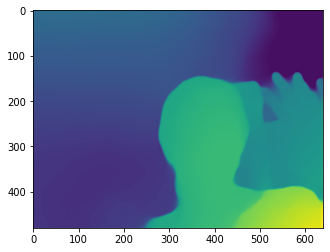

[[ 446.48312   446.07324   445.2635   ...    0.          0.
     0.      ]
 [ 446.21176   445.42157   443.8029   ...    0.          0.
     0.      ]
 [ 446.23007   444.4751    440.7882   ...    0.          0.
     0.      ]
 ...
 [ 119.1178    119.22755   119.60518  ... 1121.2288   1112.4491
  1110.0261  ]
 [ 118.32187   118.51375   119.00282  ... 1118.5443   1107.9617
  1104.8538  ]
 [ 117.9692    118.20693   118.766525 ... 1117.6702   1106.0698
  1102.562   ]]


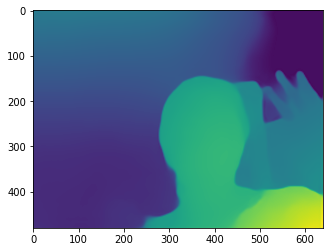

[[ 477.6442   477.461    477.05142 ...    0.         0.         0.     ]
 [ 477.2735   476.6461   475.28564 ...    0.         0.         0.     ]
 [ 477.08893  475.34067  471.56122 ...    0.         0.         0.     ]
 ...
 [ 132.89882  132.97047  133.26195 ... 1165.6772  1156.1522  1153.5122 ]
 [ 131.96063  132.12257  132.52814 ... 1163.3708  1152.336   1149.1635 ]
 [ 131.56802  131.77432  132.24101 ... 1162.6825  1150.7708  1147.272  ]]


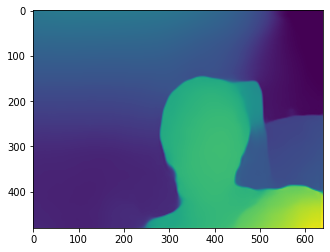

[[ 406.5486   406.6165   406.77625 ...    0.         0.         0.     ]
 [ 406.76703  406.3756   405.55612 ...    0.         0.         0.     ]
 [ 407.74835  406.23492  403.00726 ...    0.         0.         0.     ]
 ...
 [ 144.11136  144.16872  144.56378 ... 1082.093   1073.1145  1070.3805 ]
 [ 143.25792  143.36232  143.76428 ... 1080.6992  1070.9543  1068.0038 ]
 [ 142.90799  143.04547  143.47897 ... 1080.3728  1070.0962  1066.9623 ]]


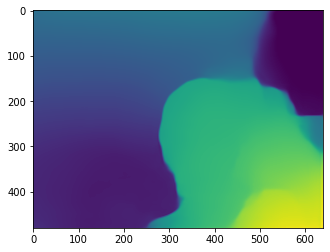

[[ 426.411    426.2816   426.0323  ...    0.         0.         0.     ]
 [ 426.45853  425.9282   424.82196 ...    0.         0.         0.     ]
 [ 427.12805  425.58847  422.30835 ...    0.         0.         0.     ]
 ...
 [ 151.43332  151.711    152.56563 ... 1095.4186  1086.002   1083.2661 ]
 [ 150.35283  150.67177  151.49486 ... 1093.4391  1082.5034  1079.2124 ]
 [ 149.87825  150.23221  151.08066 ... 1092.9384  1081.137   1077.5161 ]]


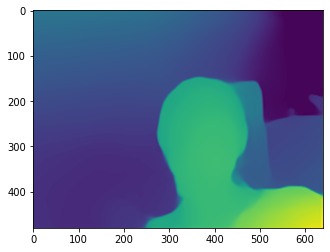

[[ 516.7281   516.74005  516.8194  ...  336.36792  309.54614  296.7596 ]
 [ 516.6079   516.0298   514.83514 ...  344.81085  321.44202  310.3665 ]
 [ 516.95013  514.927    510.59113 ...  362.71112  346.6548   339.19302]
 ...
 [ 136.0427   136.10701  136.39417 ... 1149.2947  1139.9448  1137.3416 ]
 [ 135.27219  135.41495  135.80597 ... 1146.75    1135.9811  1132.873  ]
 [ 134.95695  135.13956  135.5886  ... 1145.9702  1134.3821  1130.9674 ]]


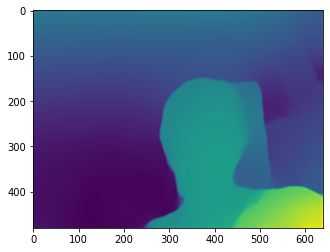

[[408.77127 408.73004 408.62195 ... 342.25775 314.38953 301.29843]
 [408.81638 408.36368 407.372   ... 348.89862 324.5433  313.18613]
 [409.43005 407.9524  404.74054 ... 363.43292 346.54343 338.86728]
 ...
 [132.62442 132.79617 133.3351  ... 780.57166 774.1599  772.15436]
 [131.85403 132.08946 132.6969  ... 777.7882  769.954   767.40393]
 [131.53534 131.80461 132.45395 ... 776.69836 768.12463 765.27466]]


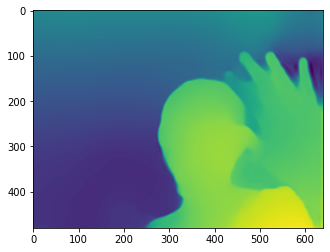

[[414.45667  414.2659   413.88464  ... 253.96841  230.2273   219.02356 ]
 [414.4392   413.84952  412.62375  ... 258.41937  236.77444  226.64516 ]
 [414.96973  413.38202  410.02826  ... 268.5842   250.9893   242.96767 ]
 ...
 [115.880455 116.08941  116.698784 ... 873.3294   861.4009   856.02466 ]
 [115.06838  115.35572  116.057655 ... 870.0944   853.5907   846.11865 ]
 [114.71781  115.05115  115.81884  ... 869.4141   850.8919   842.4858  ]]


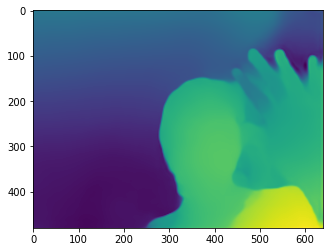

[[478.23438  478.2065   478.1014   ... 422.2556   390.44714  375.3922  ]
 [478.14584  477.61172  476.4252   ... 430.3485   402.4453   389.3582  ]
 [478.59778  476.8062   472.9107   ... 447.68066  427.97922  419.0472  ]
 ...
 [117.8524   117.93311  118.2543   ... 741.6158   728.9072   723.4089  ]
 [116.77217  116.94758  117.402115 ... 740.1469   726.6818   720.81085 ]
 [116.30927  116.53114  117.05528  ... 740.16235  726.29926  720.2286  ]]


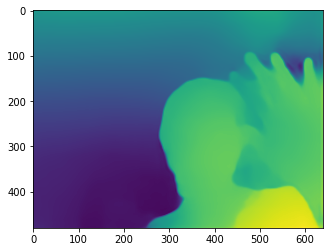

[[398.58542 398.36584 397.91495 ... 356.71982 327.84512 314.2453 ]
 [398.71765 398.11862 396.8637  ... 364.00815 338.73856 326.9346 ]
 [399.5021  397.9553  394.67725 ... 379.6338  361.98343 353.98807]
 ...
 [143.96237 144.26752 145.17094 ... 940.65076 933.57446 931.229  ]
 [143.01804 143.35736 144.22232 ... 940.00354 929.6111  925.8446 ]
 [142.5882  142.95924 143.84604 ... 939.7916  927.74835 923.2555 ]]


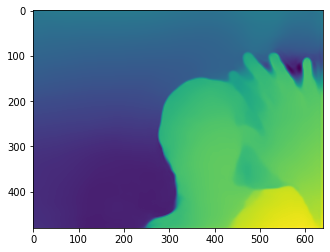

[[440.1463  440.16443 440.22482 ... 423.41418 391.9662  377.04312]
 [440.2263  439.75198 438.75287 ... 431.49207 403.88678 390.89713]
 [440.91138 439.2278  435.60608 ... 448.74133 429.2126  420.3035 ]
 ...
 [144.27107 144.35938 144.79062 ... 897.09564 890.3788  888.2386 ]
 [143.16588 143.32683 143.81343 ... 896.40625 887.3518  884.2347 ]
 [142.68251 142.88695 143.42503 ... 896.1868  885.9203  882.27954]]


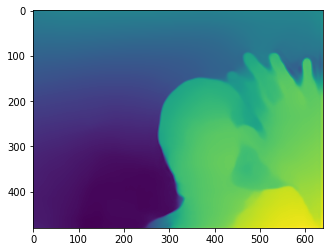

[[316.17917 316.1272  316.01447 ... 314.09937 286.31314 273.20706]
 [316.62543 316.23276 315.4034  ... 320.33224 295.50876 283.90546]
 [318.02536 316.78998 314.17596 ... 334.8289  315.7311  307.0601 ]
 ...
 [163.96133 164.17383 164.88766 ... 923.6445  916.4324  914.0791 ]
 [163.0639  163.31548 163.99776 ... 923.6581  913.67615 910.1597 ]
 [162.6819  162.96495 163.66612 ... 923.6842  912.30164 908.17755]]


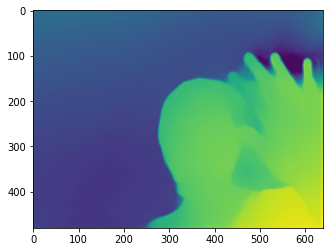

[[443.287   443.11908 442.74112 ... 436.66785 401.78476 385.42322]
 [443.12476 442.52844 441.2291  ... 445.41165 415.05194 400.92966]
 [443.40195 441.72043 438.06802 ... 464.12524 443.32623 433.94913]
 ...
 [131.27863 131.52194 132.20798 ... 924.8365  918.0623  915.8691 ]
 [130.48018 130.77365 131.48195 ... 923.92993 914.2566  910.8292 ]
 [130.13908 130.4677  131.21585 ... 923.59814 912.45337 908.3817 ]]


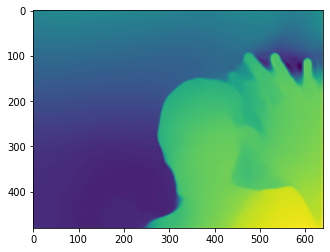

[[449.62622 449.4522  449.07074 ... 353.79886 324.4771  310.695  ]
 [449.34216 448.72186 447.37112 ... 361.19278 335.42746 323.4199 ]
 [449.34186 447.59543 443.7805  ... 377.54163 359.3462  351.1139 ]
 ...
 [140.32654 140.56784 141.28845 ... 853.60376 847.665   845.47107]
 [139.2896  139.61487 140.42586 ... 850.9593  841.85114 838.2585 ]
 [138.85109 139.22827 140.1131  ... 850.19507 839.65735 835.42334]]


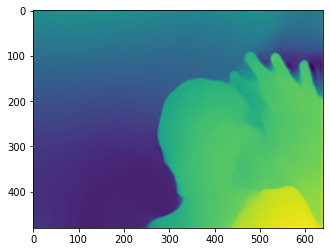

[[442.0246  441.89484 441.6717  ... 371.1018  340.6697  326.35706]
 [441.9151  441.3327  440.13385 ... 378.84018 352.25348 339.85223]
 [442.2613  440.5534  436.91104 ... 395.39062 376.95352 368.61066]
 ...
 [132.01482 132.23538 132.87675 ... 945.4245  938.3474  936.1261 ]
 [131.03934 131.35619 132.13591 ... 945.01733 935.1326  931.7252 ]
 [130.62549 130.99536 131.85919 ... 944.84784 933.5302  929.4983 ]]


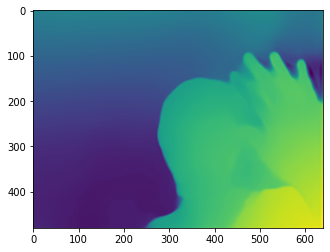

[[396.55972 396.43875 396.22333 ... 339.47586 313.13248 300.60983]
 [396.52826 396.02347 394.98737 ... 346.79996 323.77008 312.90533]
 [396.98828 395.52185 392.415   ... 362.35245 346.326   338.96854]
 ...
 [164.65698 165.08278 166.31679 ... 852.2812  845.85175 843.6695 ]
 [163.08217 163.56198 164.7647  ... 851.79443 842.5613  839.17737]
 [162.39648 162.91727 164.14551 ... 851.62744 840.9853  836.9796 ]]


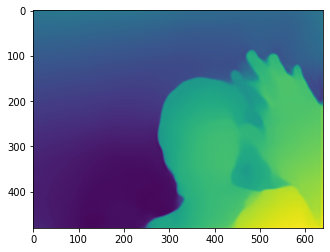

[[334.46634 334.52927 334.67572 ... 234.3753  214.5988  205.28769]
 [334.8814  334.60464 334.04028 ... 239.28984 221.9285  213.81927]
 [336.17352 335.06277 332.74002 ... 249.91678 237.69579 232.15031]
 ...
 [185.99026 186.11073 186.7545  ... 916.9217  910.22955 908.01697]
 [184.48254 184.66203 185.29655 ... 916.3174  906.3574  902.74164]
 [183.85866 184.07558 184.73196 ... 916.07935 904.4799  900.1406 ]]


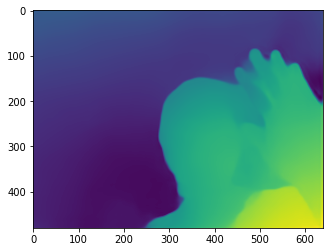

[[449.23755 449.06488 448.71967 ... 364.152   336.23077 322.95734]
 [449.15985 448.54953 447.2741  ... 371.9437  347.5762  336.07965]
 [449.57834 447.87753 444.26477 ... 388.52576 371.65128 363.9051 ]
 ...
 [172.51657 172.8833  173.99683 ... 968.70245 961.59393 959.31384]
 [171.02286 171.44916 172.5532  ... 967.803   956.6128  952.5592 ]
 [170.36835 170.83728 171.97488 ... 967.3647  954.17114 949.2247 ]]


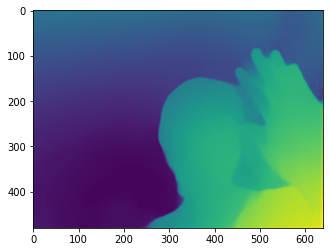

[[364.80017 364.78925 364.8414  ... 253.71767 230.62955 219.8158 ]
 [364.9693  364.55942 363.75717 ... 259.6239  239.1556  229.66296]
 [365.82773 364.43286 361.5078  ... 272.62125 257.69318 250.99797]
 ...
 [157.7224  157.85724 158.39142 ... 927.9191  921.24866 918.9988 ]
 [156.75185 156.94106 157.48692 ... 926.6579  916.6213  912.92   ]
 [156.33488 156.5627  157.14796 ... 926.17615 914.45905 910.0152 ]]


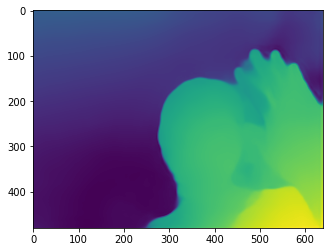

[[428.96774 428.9029  428.79416 ... 328.41418 302.74188 290.566  ]
 [428.97046 428.45862 427.38885 ... 335.37372 312.86633 302.28748]
 [429.46753 427.85095 424.38766 ... 350.20883 334.3805  327.1845 ]
 ...
 [181.4249  181.59886 182.40732 ... 866.9094  860.2261  857.97736]
 [179.99443 180.21867 180.99791 ... 867.1346  857.988   854.70123]
 [179.39111 179.64934 180.44342 ... 867.2431  856.83    852.9904 ]]


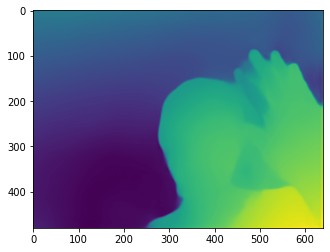

[[432.2075  432.14224 432.04907 ... 291.99997 268.6072  257.541  ]
 [432.11734 431.59576 430.51816 ... 298.2326  277.72    268.10605]
 [432.4931  430.83835 427.29956 ... 311.55582 297.1092  290.56848]
 ...
 [194.82597 195.11111 196.12712 ... 837.9915  831.95984 829.9209 ]
 [193.33109 193.60239 194.436   ... 837.71844 829.1875  826.08325]
 [192.68294 192.9669  193.7633  ... 837.7266  827.9449  824.2914 ]]


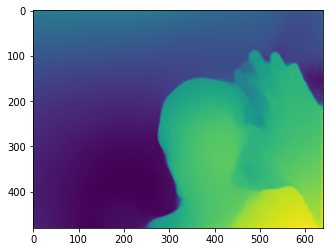

[[495.2557  495.23703 495.18604 ... 407.2888  376.1611  361.3649 ]
 [495.11252 494.56848 493.39474 ... 415.90735 388.72638 375.90018]
 [495.39838 493.56262 489.60873 ... 434.19412 415.33145 406.66013]
 ...
 [181.96417 182.19357 183.0258  ... 880.38196 873.8697  871.7467 ]
 [180.63092 180.86696 181.56602 ... 880.28107 871.056   867.77167]
 [180.06818 180.31999 180.99042 ... 880.2994  869.6909  865.797  ]]


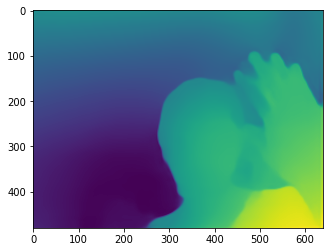

[[387.19498  386.9204   386.38397  ... 104.37538   97.77823   94.912865]
 [387.20377  386.5868   385.3201   ... 104.34506   98.78606   96.422195]
 [387.76184  386.27484  383.13925  ... 104.55125  101.258896  99.97836 ]
 ...
 [142.81104  142.99849  143.61072  ... 865.6235   859.02856  856.833   ]
 [141.80159  142.03883  142.67107  ... 865.576    855.92224  852.4207  ]
 [141.36824  141.63713  142.30061  ... 865.52454  854.34766  850.17566 ]]


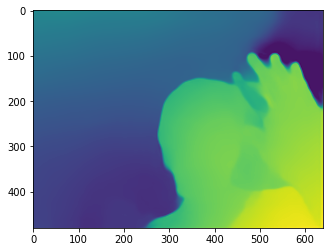

[[410.72812 410.65405 410.50543 ... 268.5863  244.10852 232.62964]
 [410.76636 410.2631  409.19507 ... 274.7281  253.1972  243.19098]
 [411.4184  409.84668 406.4745  ... 288.32965 273.0829  266.21603]
 ...
 [149.26836 149.23239 149.50684 ... 865.6557  859.16455 856.93616]
 [148.23694 148.2505  148.52968 ... 865.6005  856.57947 853.27985]
 [147.81429 147.85622 148.15218 ... 865.63794 855.34424 851.48676]]


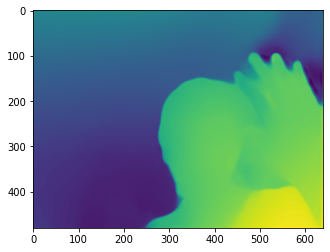

[[ 440.34814   440.2927    440.19168  ...    0.          0.
     0.      ]
 [ 440.16306   439.6256    438.48016  ...    0.          0.
     0.      ]
 [ 440.3633    438.6269    434.86612  ...    0.          0.
     0.      ]
 ...
 [ 120.71554   120.828575  121.248314 ... 1138.0922   1127.9531
  1124.9679  ]
 [ 119.92542   120.10859   120.60737  ... 1137.6897   1126.8556
  1123.7069  ]
 [ 119.57657   119.8014    120.35929  ... 1137.8309   1126.4924
  1123.186   ]]


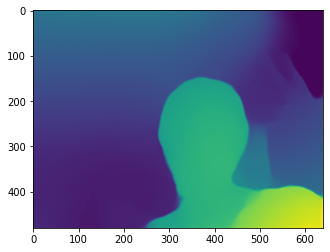

[[ 462.92285  462.73148  462.3376  ...    0.         0.         0.     ]
 [ 462.8504   462.19623  460.81027 ...    0.         0.         0.     ]
 [ 463.2987   461.48853  457.60446 ...    0.         0.         0.     ]
 ...
 [ 160.07729  160.48158  161.63269 ... 1168.146   1157.106   1153.7213 ]
 [ 158.57402  159.03355  160.16364 ... 1167.3871  1154.9579  1151.1125 ]
 [ 157.88702  158.38658  159.54312 ... 1167.3524  1154.0775  1149.9254 ]]


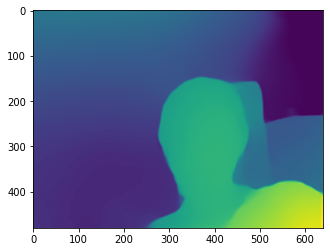

[[ 405.38806  405.26132  405.00705 ...  175.58142  160.17184  152.81955]
 [ 405.4318   404.88907  403.74615 ...  180.47736  166.75923  160.27925]
 [ 406.0534   404.47552  401.10635 ...  190.7863   180.55945  175.89305]
 ...
 [ 144.9922   145.13873  145.7121  ... 1141.2317  1129.6138  1125.9398 ]
 [ 143.92166  144.12755  144.73729 ... 1141.5466  1128.4788  1124.3381 ]
 [ 143.4755   143.71509  144.35698 ... 1141.985   1128.0432  1123.5944 ]]


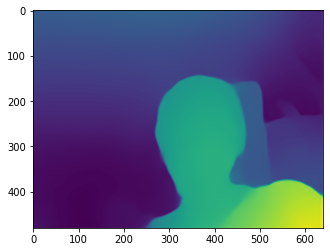

[[ 351.83325   351.27155   350.16437  ...   97.59029   101.82852
   103.85847 ]
 [ 351.5234    350.76776   349.24533  ...   96.981606  105.18077
   108.99644 ]
 [ 351.35522   350.0616    347.37814  ...   96.407875  112.96106
   120.54084 ]
 ...
 [ 197.1089    197.46298   198.58852  ... 1396.5405   1384.1349
  1380.3368  ]
 [ 195.75658   196.12859   197.13367  ... 1394.3254   1379.4463
  1374.6938  ]
 [ 195.17671   195.57556   196.571    ... 1393.6068   1377.3485
  1372.0433  ]]


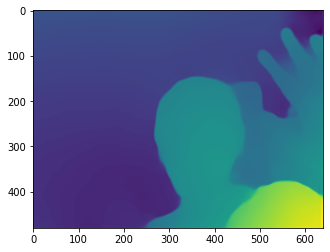

[[ 343.73114  343.4346   342.80746 ...  128.96115  133.20561  135.24753]
 [ 343.67462  343.12494  341.9724  ...  127.06417  137.28897  142.07306]
 [ 344.02197  342.81732  340.28986 ...  124.57623  147.62733  158.27306]
 ...
 [ 135.98763  136.13571  136.7052  ... 1210.764   1199.9221  1196.6628 ]
 [ 135.0902   135.30264  135.93044 ... 1209.5417  1197.3724  1193.6674 ]
 [ 134.72052  134.96703  135.63237 ... 1209.267   1196.2673  1192.257  ]]


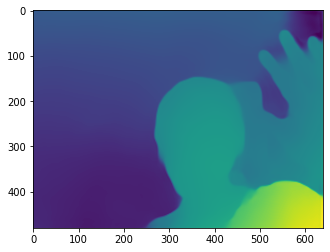

[[312.55457 312.29068 311.79926 ...   0.        0.        0.     ]
 [312.66675 312.1237  311.03732 ...   0.        0.        0.     ]
 [313.40967 312.14578 309.51294 ...   0.        0.        0.     ]
 ...
 [167.22176 167.38367 168.06717 ... 918.575   909.8198  907.1589 ]
 [165.68748 165.9432  166.65503 ... 918.36304 909.4916  906.92004]
 [165.07713 165.38806 166.14543 ... 918.5462  909.481   906.8884 ]]


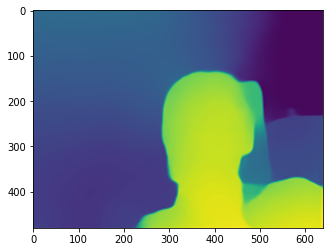

[[289.98688 289.38437 288.23077 ...   0.        0.        0.     ]
 [290.0363  289.25525 287.71216 ...   0.        0.        0.     ]
 [290.605   289.3268  286.69693 ...   0.        0.        0.     ]
 ...
 [199.80229 200.01636 200.79301 ... 985.6104  975.56555 972.41077]
 [198.38469 198.62761 199.32495 ... 986.4009  976.72437 973.8785 ]
 [197.76935 198.04335 198.74812 ... 986.993   977.3242  974.5484 ]]


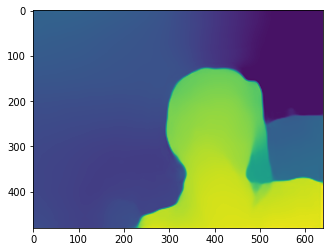

[[ 281.67212  281.30695  280.60822 ...    0.         0.         0.     ]
 [ 282.04147  281.4065   280.1213  ...    0.         0.         0.     ]
 [ 283.28036  281.94098  279.11865 ...    0.         0.         0.     ]
 ...
 [ 223.74252  224.00876  225.07965 ... 1035.1144  1024.7521  1021.5217 ]
 [ 222.09694  222.39812  223.3803  ... 1035.709   1025.6674  1022.74005]
 [ 221.40811  221.74234  222.72627 ... 1036.2222  1026.1594  1023.2963 ]]


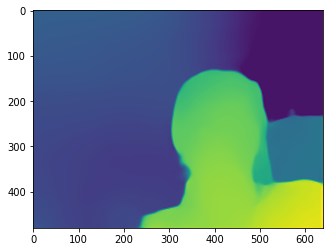

[[ 348.12436  347.60693  346.5466  ...    0.         0.         0.     ]
 [ 348.0512   347.30835  345.769   ...    0.         0.         0.     ]
 [ 348.4117   347.058    344.211   ...    0.         0.         0.     ]
 ...
 [ 241.57858  241.59875  242.06982 ... 1034.2722  1024.0277  1020.8346 ]
 [ 239.86748  239.90378  240.24446 ... 1033.9869  1023.95276 1021.0088 ]
 [ 239.12766  239.19447  239.53276 ... 1034.0876  1023.96924 1021.05884]]


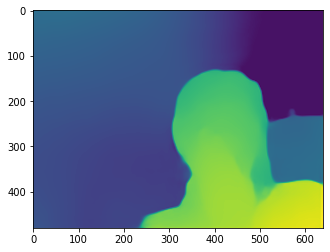

[[ 300.28033  299.9757   299.4129  ...    0.         0.         0.     ]
 [ 300.55878  299.9533   298.73825 ...    0.         0.         0.     ]
 [ 301.64978  300.26987  297.36752 ...    0.         0.         0.     ]
 ...
 [ 135.25858  135.29323  135.53523 ... 1045.363   1034.9866  1031.7545 ]
 [ 134.38591  134.55432  135.01697 ... 1045.5826  1035.1066  1031.9893 ]
 [ 134.02065  134.25633  134.8349  ... 1045.9655  1035.2769  1032.138  ]]


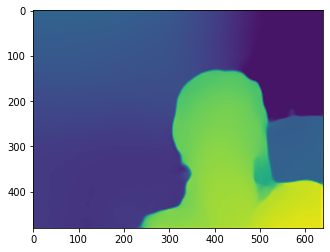

[[344.82394 344.5146  343.86328 ...   0.        0.        0.     ]
 [344.82886 344.23276 342.97617 ...   0.        0.        0.     ]
 [345.30975 343.9756  341.14642 ...   0.        0.        0.     ]
 ...
 [167.3195  167.58884 168.48474 ... 958.8738  950.0655  947.37585]
 [165.96547 166.27386 167.11682 ... 959.334   950.2931  947.63257]
 [165.39789 165.7393  166.59496 ... 959.75214 950.4227  947.6933 ]]


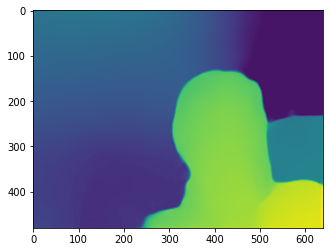

[[296.47723 296.33563 296.11606 ...   0.        0.        0.     ]
 [296.77676 296.33264 295.4748  ...   0.        0.        0.     ]
 [297.8605  296.65912 294.1951  ...   0.        0.        0.     ]
 ...
 [208.46799 208.69177 209.64754 ... 878.5152  871.1401  868.9348 ]
 [206.99715 207.23477 208.06467 ... 878.1189  869.95    867.48975]
 [206.38994 206.6526  207.4705  ... 878.18756 869.5027  866.85547]]


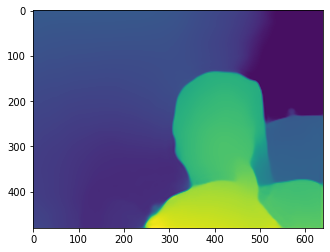

[[354.97687 354.4705  353.4846  ...   0.        0.        0.     ]
 [355.05597 354.26483 352.66797 ...   0.        0.        0.     ]
 [355.72852 354.19162 350.9852  ...   0.        0.        0.     ]
 ...
 [261.07065 261.2136  262.1547  ... 944.62775 936.1583  933.60095]
 [259.17206 259.30188 260.02698 ... 944.48474 935.95404 933.49414]
 [258.38568 258.5349  259.22232 ... 944.6639  935.93567 933.444  ]]


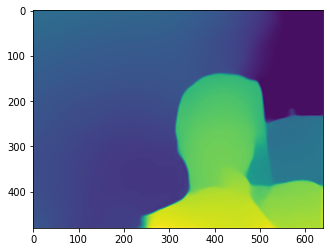

[[373.77658 373.45697 372.81497 ...   0.        0.        0.     ]
 [373.75302 373.15378 371.91812 ...   0.        0.        0.     ]
 [374.20233 372.871   370.06583 ...   0.        0.        0.     ]
 ...
 [167.6405  167.79962 168.479   ... 940.62695 932.70984 930.3975 ]
 [166.56372 166.7815  167.459   ... 939.95624 931.74695 929.4179 ]
 [166.1138  166.36969 167.07408 ... 939.89606 931.38513 928.972  ]]


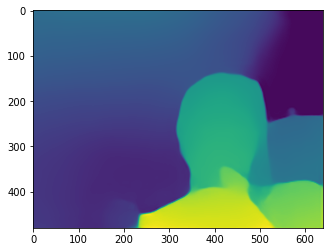

[[343.70905 343.32513 342.5829  ...   0.        0.        0.     ]
 [343.65665 343.00974 341.70267 ...   0.        0.        0.     ]
 [344.08752 342.74283 339.92902 ...   0.        0.        0.     ]
 ...
 [197.28668 197.30208 197.8629  ... 939.0711  930.9559  928.5403 ]
 [195.8509  195.87589 196.30629 ... 938.66455 930.34204 927.9474 ]
 [195.27208 195.31767 195.7287  ... 938.71265 930.12665 927.6649 ]]


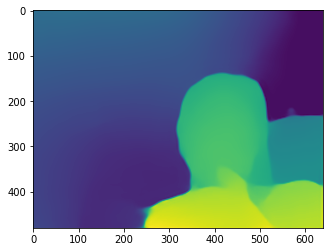

[[422.97556 422.73077 422.2342  ...   0.        0.        0.     ]
 [423.04407 422.3998  421.04813 ...   0.        0.        0.     ]
 [423.65967 422.01398 418.5017  ...   0.        0.        0.     ]
 ...
 [169.8636  170.1672  171.09923 ... 812.78284 805.7694  803.69116]
 [168.40524 168.77159 169.70827 ... 812.6227  805.8109  803.92883]
 [167.75262 168.16745 169.1543  ... 812.7539  805.8927  804.0363 ]]


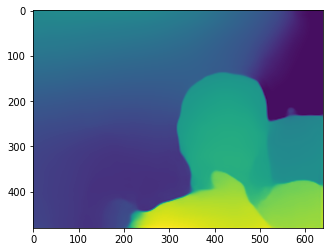

[[399.95615 399.28952 397.96707 ...   0.        0.        0.     ]
 [399.83398 398.88165 396.9465  ...   0.        0.        0.     ]
 [400.18872 398.47238 394.88885 ...   0.        0.        0.     ]
 ...
 [197.56337 197.74834 198.5146  ... 860.0515  852.69995 850.52234]
 [196.10875 196.35883 197.12357 ... 859.30585 851.96796 849.90826]
 [195.50256 195.79488 196.59015 ... 859.1685  851.68427 849.6091 ]]


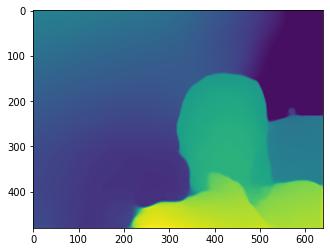

[[412.37653 412.17706 411.79034 ...   0.        0.        0.     ]
 [412.41492 411.80258 410.5388  ...   0.        0.        0.     ]
 [413.0271  411.3911  407.93893 ...   0.        0.        0.     ]
 ...
 [179.61296 179.5976  179.84723 ... 889.43097 881.62286 879.28394]
 [178.18405 178.20793 178.40544 ... 889.2978  881.3664  879.0945 ]
 [177.56076 177.61728 177.82852 ... 889.4218  881.2685  878.9522 ]]


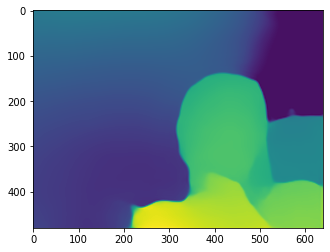

[[468.37494 467.92157 467.0462  ...   0.        0.        0.     ]
 [467.94342 467.0936  465.3481  ...   0.        0.        0.     ]
 [467.70963 465.83148 461.81866 ...   0.        0.        0.     ]
 ...
 [142.47298 142.61043 143.137   ... 844.1163  837.0403  834.9509 ]
 [141.3577  141.55293 142.09328 ... 843.49774 836.1582  834.0559 ]
 [140.8579  141.092   141.67032 ... 843.4246  835.8107  833.63226]]


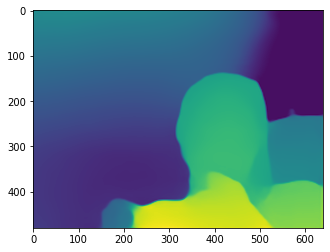

[[372.899    372.3022   371.09448  ...   0.         0.         0.      ]
 [372.8354   371.98886  370.24722  ...   0.         0.         0.      ]
 [373.2958   371.77188  368.57178  ...   0.         0.         0.      ]
 ...
 [110.17432  110.102905 110.070496 ... 891.0824   883.1894   880.8324  ]
 [109.73813  109.78431  109.96847  ... 890.9637   883.3296   881.211   ]
 [109.57323  109.67502  109.96242  ... 891.14905  883.4784   881.39905 ]]


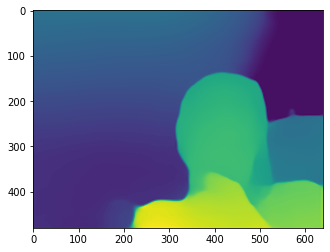

[[480.24017 480.11398 479.9146  ...   0.        0.        0.     ]
 [480.2254  479.5725  478.2323  ...   0.        0.        0.     ]
 [480.76788 478.81842 474.6509  ...   0.        0.        0.     ]
 ...
 [134.71014 134.64642 134.68787 ... 862.69556 854.9258  852.5589 ]
 [133.91615 133.92796 134.04596 ... 863.1755  855.6406  853.4948 ]
 [133.57187 133.6231  133.78937 ... 863.6339  856.056   853.9435 ]]


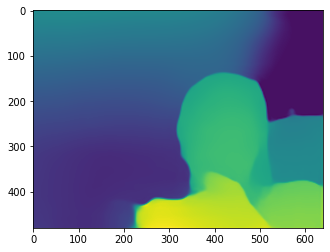

[[444.49823 444.03308 443.10577 ...   0.        0.        0.     ]
 [444.2624  443.45422 441.78674 ...   0.        0.        0.     ]
 [444.37335 442.6688  439.05215 ...   0.        0.        0.     ]
 ...
 [146.27287 146.25284 146.44244 ... 840.9396  833.13684 830.74036]
 [145.31866 145.33289 145.48253 ... 841.0674  833.5807  831.45557]
 [144.893   144.93568 145.0995  ... 841.3298  833.84247 831.7759 ]]


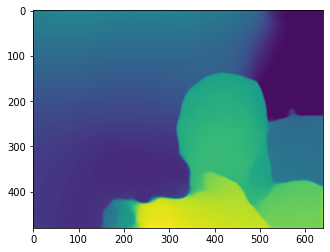

[[417.97235 417.1479  415.49692 ...   0.        0.        0.     ]
 [417.48767 416.46106 414.3753  ...   0.        0.        0.     ]
 [417.17316 415.55856 412.19968 ...   0.        0.        0.     ]
 ...
 [150.50314 150.44046 150.53816 ... 841.47906 833.53625 831.07764]
 [149.69595 149.66806 149.72055 ... 841.8648  834.1788  831.96344]
 [149.35571 149.35498 149.41653 ... 842.25037 834.53143 832.3599 ]]


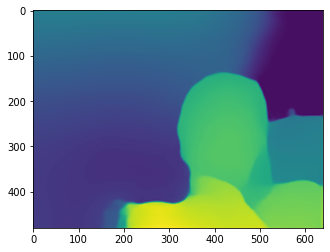

[[465.931   465.84488 465.6933  ...   0.        0.        0.     ]
 [465.87094 465.31982 464.16934 ...   0.        0.        0.     ]
 [466.2855  464.57825 460.92307 ...   0.        0.        0.     ]
 ...
 [140.60905 140.61752 140.86066 ... 886.1485  878.2904  875.9414 ]
 [139.76143 139.79787 139.9995  ... 885.42505 877.5768  875.357  ]
 [139.39464 139.453   139.6602  ... 885.3332  877.3405  875.11237]]


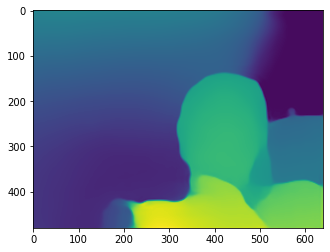

[[479.224   478.972   478.49887 ...   0.        0.        0.     ]
 [478.9931  478.31174 476.9026  ...   0.        0.        0.     ]
 [479.09894 477.31982 473.50024 ...   0.        0.        0.     ]
 ...
 [166.34363 166.35376 166.68338 ... 911.1841  902.6831  900.10046]
 [165.16692 165.17386 165.375   ... 910.89404 902.52856 900.13965]
 [164.66457 164.68414 164.86252 ... 911.0005  902.53894 900.168  ]]


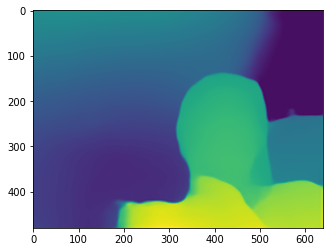

[[424.06323 423.69635 422.9884  ...   0.        0.        0.     ]
 [424.02423 423.28195 421.76495 ...   0.        0.        0.     ]
 [424.52884 422.82593 419.22705 ...   0.        0.        0.     ]
 ...
 [182.8571  182.93454 183.42393 ... 859.6334  851.9563  849.6457 ]
 [181.47069 181.54143 181.89401 ... 858.97943 851.4331  849.2952 ]
 [180.858   180.94345 181.27725 ... 858.91327 851.2761  849.1496 ]]


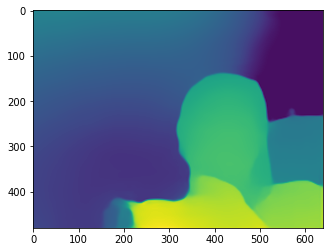

[[422.82333 422.3034  421.2403  ...   0.        0.        0.     ]
 [422.7572  421.91733 420.17065 ...   0.        0.        0.     ]
 [423.2254  421.54626 417.99246 ...   0.        0.        0.     ]
 ...
 [159.29074 159.30722 159.59239 ... 891.1841  883.4171  881.1241 ]
 [158.15149 158.2173  158.49138 ... 890.47894 883.0451  881.0197 ]
 [157.65268 157.75278 158.0526  ... 890.37756 882.9469  880.9773 ]]


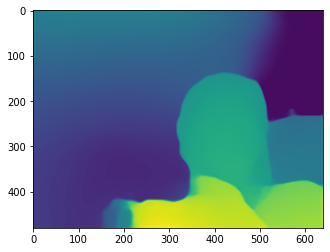

[[438.7996  438.49457 437.8903  ...   0.        0.        0.     ]
 [438.70544 438.01602 436.5914  ...   0.        0.        0.     ]
 [439.0941  437.42978 433.90918 ...   0.        0.        0.     ]
 ...
 [188.13681 188.06718 188.20645 ... 891.99677 883.9022  881.46106]
 [186.63635 186.63948 186.80797 ... 891.54694 883.53436 881.2519 ]
 [186.003   186.05    186.26071 ... 891.58386 883.4482  881.16644]]


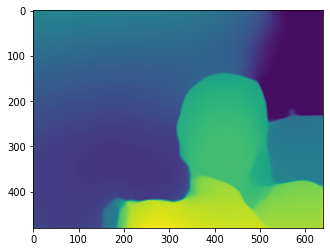

[[466.34396  465.96042  465.1633   ...   0.         0.         0.      ]
 [466.25845  465.48904  463.86163  ...   0.         0.         0.      ]
 [466.68225  464.91937  461.1379   ...   0.         0.         0.      ]
 ...
 [117.33767  117.67522  118.51641  ... 914.0719   905.3663   902.6841  ]
 [116.36976  116.74985  117.58659  ... 914.2648   905.8475   903.43286 ]
 [115.930374 116.34378  117.211845 ... 914.59143  906.1515   903.7903  ]]


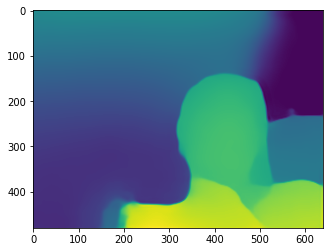

[[381.7678  381.28058 380.30457 ...   0.        0.        0.     ]
 [381.5695  380.85315 379.39108 ...   0.        0.        0.     ]
 [381.7042  380.36417 377.56808 ...   0.        0.        0.     ]
 ...
 [173.5664  173.58069 173.83691 ... 904.8793  897.4136  895.25934]
 [172.54694 172.60576 172.83015 ... 903.77515 896.18304 894.08923]
 [172.10489 172.19533 172.43474 ... 903.5027  895.6908  893.5522 ]]


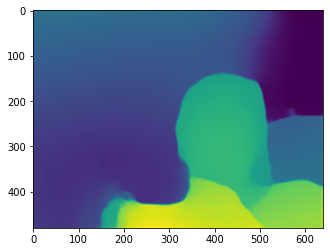

[[417.7041  417.4749  417.04755 ...   0.        0.        0.     ]
 [417.5841  416.9712  415.71146 ...   0.        0.        0.     ]
 [417.91083 416.32175 412.93207 ...   0.        0.        0.     ]
 ...
 [158.05557 158.27365 158.98245 ... 769.73395 762.9104  760.8418 ]
 [156.82375 157.05641 157.67535 ... 769.14703 762.4719  760.5711 ]
 [156.27771 156.5321  157.1472  ... 769.09143 762.35364 760.471  ]]


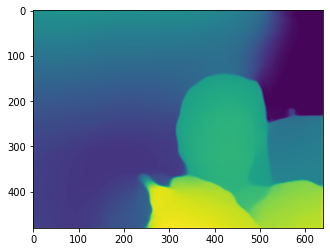

[[403.1983  402.96194 402.4965  ...   0.        0.        0.     ]
 [403.18478 402.60974 401.42862 ...   0.        0.        0.     ]
 [403.7     402.26617 399.2575  ...   0.        0.        0.     ]
 ...
 [158.23706 158.57126 159.53827 ... 881.0991  872.5968  869.95215]
 [156.9179  157.2604  158.1123  ... 880.8346  872.2986  869.7794 ]
 [156.33029 156.69743 157.54796 ... 880.9331  872.2331  869.7051 ]]


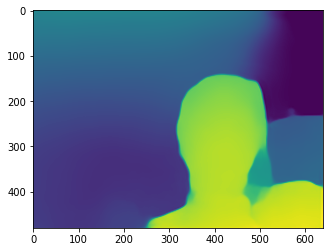

[[ 414.2819   414.17343  413.93048 ...    0.         0.         0.     ]
 [ 414.31396  413.78732  412.6469  ...    0.         0.         0.     ]
 [ 415.00757  413.42703  410.00946 ...    0.         0.         0.     ]
 ...
 [ 131.87646  131.995    132.45142 ... 1051.6399  1041.3773  1038.2133 ]
 [ 130.86082  131.05217  131.57664 ... 1051.2715  1040.9218  1037.8785 ]
 [ 130.40775  130.64215  131.22174 ... 1051.3673  1040.8182  1037.7595 ]]


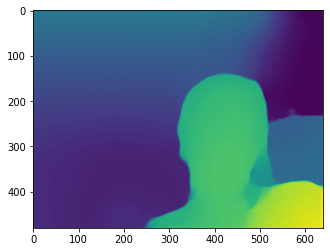

[[ 320.92804  320.58432  319.9421  ...    0.         0.         0.     ]
 [ 321.17307  320.53687  319.26147 ...    0.         0.         0.     ]
 [ 322.22888  320.8329   317.9057  ...    0.         0.         0.     ]
 ...
 [ 144.77284  144.7503   144.88158 ... 1009.5988  1000.1361   997.2909 ]
 [ 143.94958  143.99796  144.20053 ... 1009.0326   999.35376  996.5575 ]
 [ 143.61317  143.69861  143.94667 ... 1009.0395   999.1026   996.2581 ]]


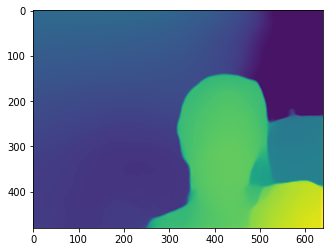

[[ 384.84314  384.6915   384.39783 ...    0.         0.         0.     ]
 [ 385.00793  384.46848  383.3452  ...    0.         0.         0.     ]
 [ 385.86606  384.3581   381.14944 ...    0.         0.         0.     ]
 ...
 [ 142.81413  142.9006   143.2721  ... 1059.6382  1049.6633  1046.654  ]
 [ 141.72446  141.93504  142.47882 ... 1058.881   1048.4338  1045.369  ]
 [ 141.25955  141.53569  142.18054 ... 1058.7836  1047.929   1044.7538 ]]


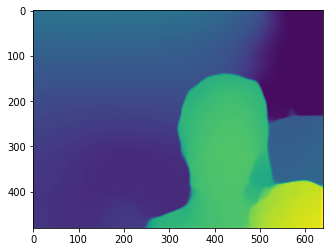

[[ 436.46378   436.33426   436.10767  ...    0.          0.
     0.      ]
 [ 436.38263   435.81018   434.62436  ...    0.          0.
     0.      ]
 [ 436.7657    435.0885    431.49445  ...    0.          0.
     0.      ]
 ...
 [ 120.10903   120.41443   121.241875 ... 1012.4338   1003.38403
  1000.7172  ]
 [ 118.91555   119.27225   120.11352  ... 1011.32837  1001.93744
   999.2546  ]
 [ 118.387375  118.77669   119.646286 ... 1011.0906   1001.37976
   998.6167  ]]


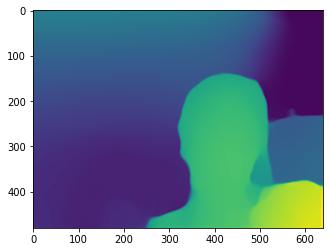

[[328.05997 327.8795  327.537   ...   0.        0.        0.     ]
 [328.24957 327.7634  326.76523 ...   0.        0.        0.     ]
 [329.18903 327.9184  325.22653 ...   0.        0.        0.     ]
 ...
 [141.57274 141.75966 142.41507 ... 987.1443  977.43506 974.42554]
 [140.61064 140.84758 141.5327  ... 986.8492  977.02264 974.1125 ]
 [140.18196 140.44998 141.16824 ... 986.957   976.91034 973.9717 ]]


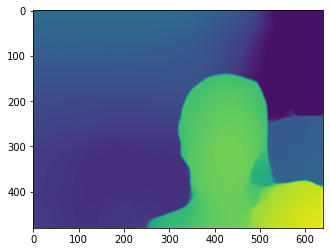

[[408.71194 408.452   407.94717 ...   0.        0.        0.     ]
 [408.7285  408.12604 406.88867 ...   0.        0.        0.     ]
 [409.3484  407.86584 404.73193 ...   0.        0.        0.     ]
 ...
 [140.6029  140.66621 141.02411 ... 933.71484 924.96716 922.3108 ]
 [139.67055 139.79578 140.18776 ... 932.99475 924.15436 921.5968 ]
 [139.26479 139.43086 139.86946 ... 932.89056 923.86414 921.28827]]


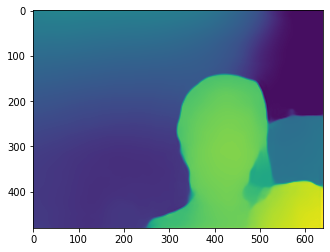

[[424.38815  424.32263  424.18335  ...   0.         0.         0.      ]
 [424.54968  424.02423  422.91058  ...   0.         0.         0.      ]
 [425.49094  423.82858  420.28836  ...   0.         0.         0.      ]
 ...
 [119.58537  119.55094  119.61894  ... 965.4927   956.13763  953.25    ]
 [118.93844  119.006874 119.258316 ... 965.49274  956.6495   954.11945 ]
 [118.67369  118.790695 119.12933  ... 965.6834   956.91187  954.4733  ]]


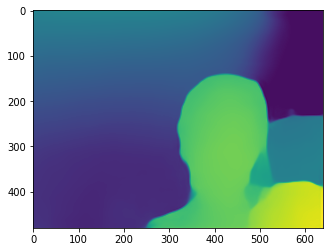

[[367.2355  366.89325 366.22168 ...   0.        0.        0.     ]
 [367.2923  366.67328 365.41345 ...   0.        0.        0.     ]
 [367.9423  366.60245 363.7991  ...   0.        0.        0.     ]
 ...
 [148.46353 148.50633 148.80414 ... 972.9448  964.33325 961.7781 ]
 [147.3542  147.4933  147.90248 ... 971.242   962.3114  959.74475]
 [146.88943 147.07944 147.55782 ... 970.68756 961.449   958.8049 ]]


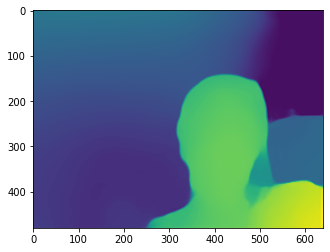

[[336.74557 336.43546 335.8598  ...   0.        0.        0.     ]
 [336.88464 336.29218 335.11475 ...   0.        0.        0.     ]
 [337.69745 336.37555 333.63443 ...   0.        0.        0.     ]
 ...
 [139.85822 139.97977 140.46234 ... 996.085   985.87463 982.6707 ]
 [139.19525 139.36797 139.88078 ... 996.46484 986.07324 982.94617]
 [138.91533 139.12253 139.6759  ... 996.9118  986.2921  983.1363 ]]


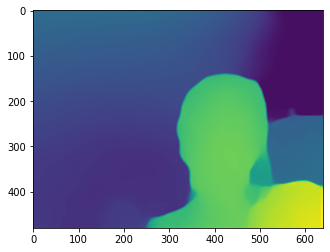

[[422.31317 422.13312 421.8303  ...   0.        0.        0.     ]
 [422.0926  421.49228 420.2801  ...   0.        0.        0.     ]
 [422.22498 420.57007 417.06366 ...   0.        0.        0.     ]
 ...
 [155.11017 155.1936  155.63477 ... 982.6144  972.55145 969.3816 ]
 [153.96707 154.10822 154.56183 ... 982.8009  972.92596 969.9889 ]
 [153.47472 153.65576 154.14888 ... 983.10376 973.1563  970.25586]]


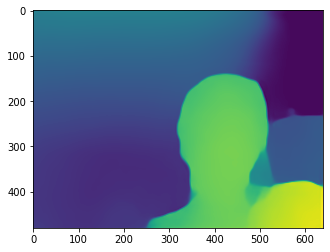

[[ 390.95895  390.74286  390.3097  ...    0.         0.         0.     ]
 [ 391.03543  390.46524  389.27444 ...    0.         0.         0.     ]
 [ 391.7676   390.29532  387.16107 ...    0.         0.         0.     ]
 ...
 [ 147.24542  147.27864  147.54414 ... 1036.6437  1026.162   1022.8954 ]
 [ 146.32487  146.43805  146.80525 ... 1036.0864  1025.0414  1021.68994]
 [ 145.95148  146.10634  146.53305 ... 1036.0829  1024.5999  1021.1297 ]]


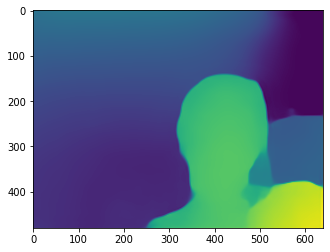

[[ 444.7305   444.5265   444.1442  ...    0.         0.         0.     ]
 [ 444.43362  443.81015  442.5261  ...    0.         0.         0.     ]
 [ 444.4116   442.73068  439.15503 ...    0.         0.         0.     ]
 ...
 [ 134.1228   134.28548  134.80614 ... 1025.8135  1015.37555 1012.102  ]
 [ 133.01286  133.28253  133.94437 ... 1025.828   1015.27216 1012.12085]
 [ 132.53894  132.86792  133.61983 ... 1026.087   1015.32086 1012.15704]]


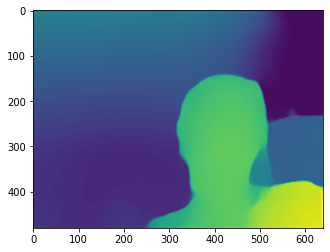

[[ 449.1114    448.82617   448.28082  ...    0.          0.
     0.      ]
 [ 448.8183    448.1464    446.77493  ...    0.          0.
     0.      ]
 [ 448.83057   447.17374   443.6821   ...    0.          0.
     0.      ]
 ...
 [ 126.943     127.056335  127.46003  ... 1007.9342    997.8877
   994.7744  ]
 [ 125.891266  126.06127   126.484184 ... 1007.8075    997.37225
   994.2474  ]
 [ 125.44484   125.650085  126.105896 ... 1008.01685   997.2414
   994.0396  ]]


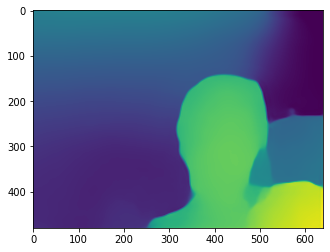

[[430.46527  430.00525  429.123    ...   0.         0.         0.      ]
 [430.20447  429.42398  427.85614  ...   0.         0.         0.      ]
 [430.29858  428.67657  425.29745  ...   0.         0.         0.      ]
 ...
 [126.5025   126.63544  127.11732  ... 997.49115  988.2004   985.40137 ]
 [125.552315 125.75147  126.28022  ... 996.8512   987.6232   985.00366 ]
 [125.14968  125.39021  125.96791  ... 996.80536  987.44855  984.8414  ]]


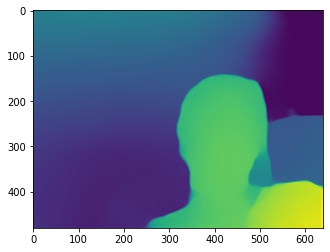

[[537.33014 537.2843  537.2703  ...   0.        0.        0.     ]
 [537.3176  536.6429  535.26306 ...   0.        0.        0.     ]
 [537.87854 535.66693 530.9262  ...   0.        0.        0.     ]
 ...
 [160.49203 160.5776  161.00807 ... 917.12646 908.47266 905.85486]
 [159.17084 159.31699 159.7536  ... 916.6143  907.78186 905.22363]
 [158.58324 158.77023 159.2432  ... 916.61273 907.5465  904.948  ]]


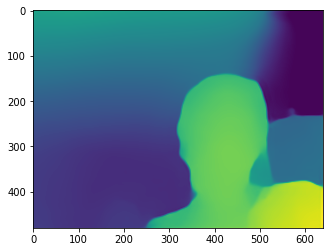

[[ 348.9237    348.63797   348.09735  ...    0.          0.
     0.      ]
 [ 349.04553   348.4725    347.31152  ...    0.          0.
     0.      ]
 [ 349.83875   348.51727   345.73257  ...    0.          0.
     0.      ]
 ...
 [ 127.759865  127.98867   128.65213  ... 1050.8604   1040.3467
  1037.0786  ]
 [ 126.68166   126.980095  127.70675  ... 1050.5181   1039.6254
  1036.3569  ]
 [ 126.20507   126.54088   127.30929  ... 1050.6295   1039.4022
  1036.0629  ]]


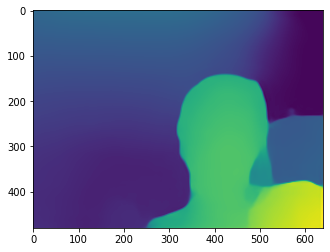

[[453.5572  453.08527 452.17548 ...   0.        0.        0.     ]
 [453.2228  452.40717 450.76373 ...   0.        0.        0.     ]
 [453.13092 451.42355 447.86188 ...   0.        0.        0.     ]
 ...
 [130.19463 130.2864  130.6694  ... 890.9866  882.2206  879.51855]
 [129.28845 129.45425 129.88998 ... 891.15826 882.525   880.0165 ]
 [128.88768 129.09816 129.58545 ... 891.4811  882.76636 880.2835 ]]


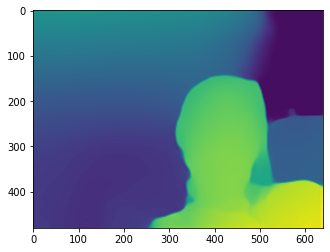

[[353.439   353.18732 352.72443 ...   0.        0.        0.     ]
 [353.65182 353.08444 351.9506  ...   0.        0.        0.     ]
 [354.60028 353.23245 350.387   ...   0.        0.        0.     ]
 ...
 [160.78175 160.7493  160.90285 ... 996.7001  987.2555  984.32245]
 [159.74103 159.78062 159.9888  ... 996.31134 986.6159  983.70715]
 [159.3074  159.3868  159.63873 ... 996.3776  986.38916 983.4117 ]]


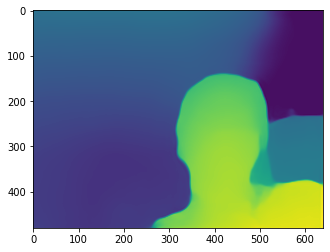

[[384.5464  384.101   383.2331  ...   0.        0.        0.     ]
 [384.4926  383.74524 382.23013 ...   0.        0.        0.     ]
 [384.98706 383.447   380.2218  ...   0.        0.        0.     ]
 ...
 [130.4066  130.48666 130.82764 ... 980.13916 970.8332  967.9639 ]
 [129.45363 129.61937 130.05066 ... 979.8789  970.3671  967.5469 ]
 [129.05196 129.2654  129.76001 ... 980.0151  970.2383  967.3641 ]]


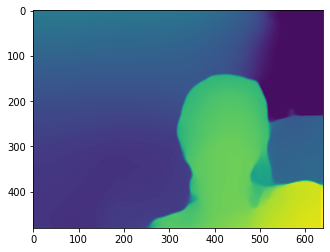

[[404.0501  403.6554  402.86145 ...   0.        0.        0.     ]
 [403.91415 403.21176 401.77582 ...   0.        0.        0.     ]
 [404.23108 402.72992 399.6129  ...   0.        0.        0.     ]
 ...
 [135.36768 135.41083 135.66885 ... 947.49097 939.13904 936.64594]
 [134.43752 134.57861 134.9582  ... 946.6944  937.93414 935.37506]
 [134.02896 134.22142 134.67369 ... 946.55585 937.43835 934.77216]]


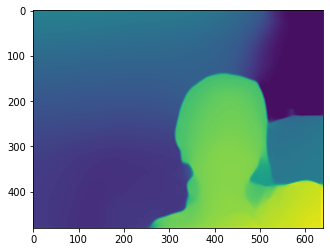

[[363.81766 363.6429  363.26312 ...   0.        0.        0.     ]
 [363.96765 363.4717  362.42105 ...   0.        0.        0.     ]
 [364.813   363.50314 360.7373  ...   0.        0.        0.     ]
 ...
 [154.09018 154.24075 154.75201 ... 951.59436 943.0836  940.50543]
 [153.08028 153.25458 153.6839  ... 950.5541  941.5291  938.84344]
 [152.63326 152.83473 153.26752 ... 950.28937 940.8631  938.05286]]


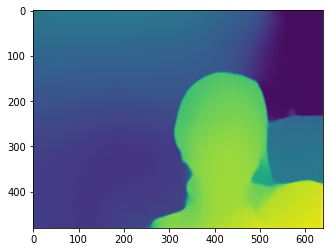

[[382.85495   382.42078   381.5645    ...   8.685812    8.007694
    7.7130046]
 [382.84735   382.10843   380.60303   ...   8.474283    7.8946514
    7.6392508]
 [383.41434   381.88055   378.6693    ...   8.017063    7.66712
    7.5031033]
 ...
 [163.49904   163.84872   164.90811   ... 894.9758    887.63434
  885.49097  ]
 [162.26338   162.63031   163.58736   ... 893.7683    886.04193
  883.83673  ]
 [161.7181    162.10641   163.05035   ... 893.40765   885.3455
  883.0392   ]]


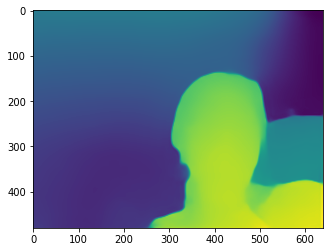

[[360.4829  360.04807 359.24387 ...   0.        0.        0.     ]
 [360.391   359.67072 358.2485  ...   0.        0.        0.     ]
 [360.77838 359.307   356.25153 ...   0.        0.        0.     ]
 ...
 [176.04417 176.18275 176.78162 ... 886.14386 878.3336  875.9748 ]
 [174.64508 174.83505 175.4131  ... 885.7685  877.8924  875.6139 ]
 [174.03214 174.26205 174.87216 ... 885.8163  877.75104 875.4377 ]]


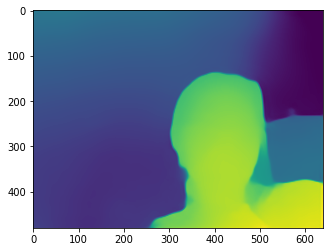

[[349.3545  348.92157 348.0399  ...   0.        0.        0.     ]
 [349.42148 348.67722 347.12524 ...   0.        0.        0.     ]
 [350.15262 348.59628 345.28552 ...   0.        0.        0.     ]
 ...
 [157.74164 157.80872 158.17776 ... 877.6448  869.5904  867.0985 ]
 [156.69713 156.84766 157.28923 ... 877.60205 869.3362  866.8662 ]
 [156.25415 156.45184 156.95029 ... 877.8011  869.27954 866.7477 ]]


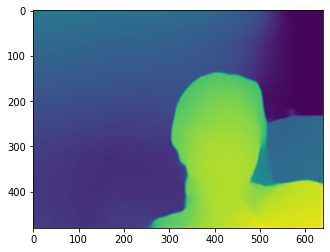

[[370.6706  370.54062 370.30106 ...   0.        0.        0.     ]
 [370.76254 370.2997  369.36652 ...   0.        0.        0.     ]
 [371.4462  370.15134 367.4704  ...   0.        0.        0.     ]
 ...
 [153.15852 153.36687 154.08914 ... 879.56256 872.0151  869.7821 ]
 [152.06607 152.28732 152.9196  ... 878.63464 870.8315  868.5893 ]
 [151.57274 151.81544 152.44543 ... 878.4359  870.3608  868.04443]]


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [6]:
# Input transformation pipeline
transforms = torch.hub.load('intel-isl/MiDaS', 'transforms')
transform = transforms.small_transform 

# Hook into OpenCV
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()

    # Transform input for midas 
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    imgbatch = transform(img).to('cpu')

    # Make a prediction
    with torch.no_grad(): 
        prediction = midas(imgbatch)
        prediction = torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size = img.shape[:2], 
            mode='bicubic', 
            align_corners=False
        ).squeeze()

        output = prediction.cpu().numpy()

        print(output)
    plt.imshow(output)
    cv2.imshow('CV2Frame', frame)
    plt.pause(0.00001)

    if cv2.waitKey(10) & 0xFF == ord('q'): 
        cap.release()
        cv2.destroyAllWindows()

plt.show()